<a href="https://colab.research.google.com/github/Herdvair/Feature-Importance-Analysis-dan-Model-Interpretation/blob/main/Feature_Importance_Analysis_%26_Model_Interpretation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
!pip install scipy==1.11.4
!pip install dalex
!pip install scikit-plot
!pip install shap
!pip install lime

In [ ]:
!pip install numpy==1.24.4 --force-reinstall
!pip install scipy==1.11.4 --force-reinstall

  Using cached numpy-1.24.4.tar.gz (10.9 MB)
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
  Using cached scipy-1.11.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached scipy-1.11.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (35.8 MB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB

In [ ]:
# import pandas for data wrangling
import pandas as pd
# import numpy for vectorize data manipulation
import numpy as np
# import matplotlib.pyplot module for data visualization
import matplotlib.pyplot as plt
# import seaborn for data visualization
import seaborn as sns
# import scipy for certain statistical function
from scipy import stats

# import train and test split method from scikit-learn
from sklearn.model_selection import train_test_split
# import metrics method for model evaluation
import sklearn.metrics as metrics
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier
# import multi-layer perceptron
from sklearn.neural_network import MLPClassifier
# import decision tree model as surrogate model
from sklearn.tree import DecisionTreeClassifier
# import tree module
from sklearn import tree

# import xgboost classifier
from xgboost import XGBClassifier

# import dalex to explain complex model
import dalex as dx

# load scikit-plot modules
import scikitplot as skplt

# load shap package for shap explanation
import shap

# load LimeTabularExplainer for LIME method
from lime.lime_tabular import LimeTabularExplainer

from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, GridSearchCV

from imblearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE

# Set the maximum number of columns and rows to display to a large number
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x798ea06a5940>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.12/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/ctypes/__init__.py", line 379, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() error


# Load Dataset

In [ ]:
df = pd.read_csv("/content/bank_churn_data.csv")

In [ ]:
df.head()

,user_id,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# Data Understanding

In [ ]:
def data_understanding (df : object) -> object:
    print('\n ===== Shape =====')
    print(df.shape)

    print('\n ===== Info =====')
    df.info()

    print('\n ===== Describe =====')
    print(df.describe())

    print('\n ===== Missing Value =====')
    print(df.isna().sum())

    print('\n ===== Duplicated Value =====')
    print(len(df.drop_duplicates())/len(df))

In [ ]:
data_understanding(df)


 ===== Shape =====
(10127, 21)

 ===== Info =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_lim

In [ ]:
for i in df.columns:
  print(f"==========={i}===========")
  print(df[i].value_counts())

Streaming output truncated to the last 5000 lines.
1209      2
2278      2
2987      2
1662      2
1901      2
2498      2
1366      2
1900      2
1161      2
2807      2
1960      2
906       2
1839      2
2909      2
647       2
1275      2
1452      2
2536      2
2922      2
2960      2
1702      2
2849      2
1207      2
2409      2
2754      2
2718      2
3626      2
2157      2
2147      2
1822      2
1981      2
1624      2
3183      2
1126      2
1841      2
1195      2
2000      2
3148      2
3343      2
1916      2
1170      2
1819      2
3203      2
1197      2
1926      2
1634      2
2218      2
2154      2
1135      2
1659      2
2399      2
2903      2
2739      2
4357      2
1878      2
2564      2
2902      2
705       2
3428      2
2135      2
1750      2
2266      2
2099      2
3888      2
1742      2
3783      2
1131      2
1243      2
1997      2
1194      2
1431      2
1526      2
2043      2
1473      2
2619      2
2117      2
2761      2
3094      2
2874      2
1

In [ ]:
num_col = df.select_dtypes(include=['int64','float64']).columns


def check_plot(df):

    for i in num_col:

    # tentukan ukuran gambar
        plt.figure(figsize=(20, 4))

        # histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[i], bins=30)
        plt.title('Histogram')

       # box plot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[i])
        plt.title('Boxplot')

        plt.show()

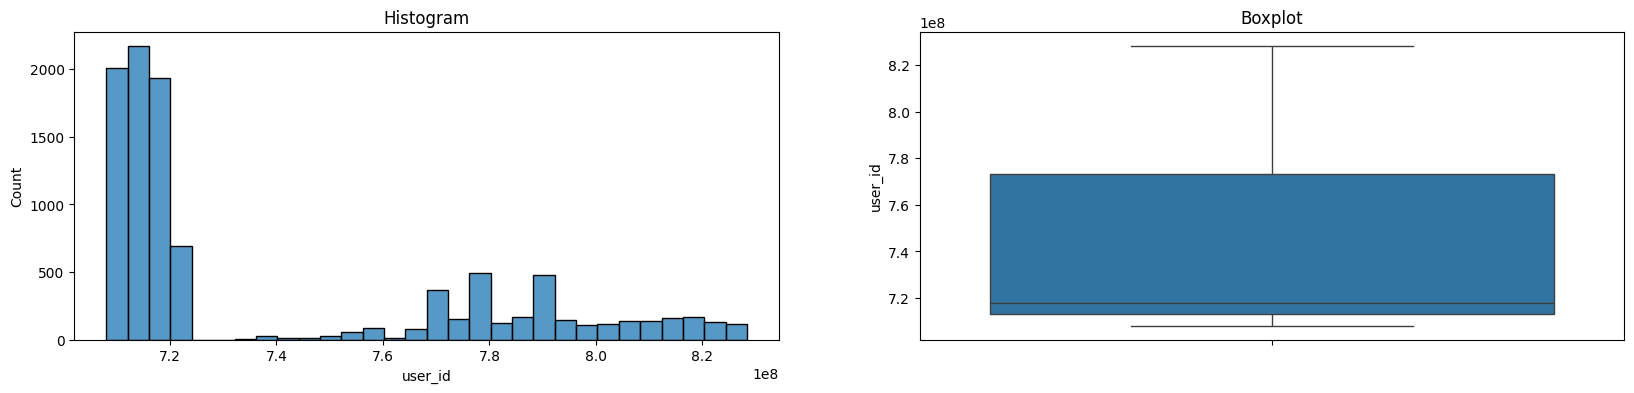

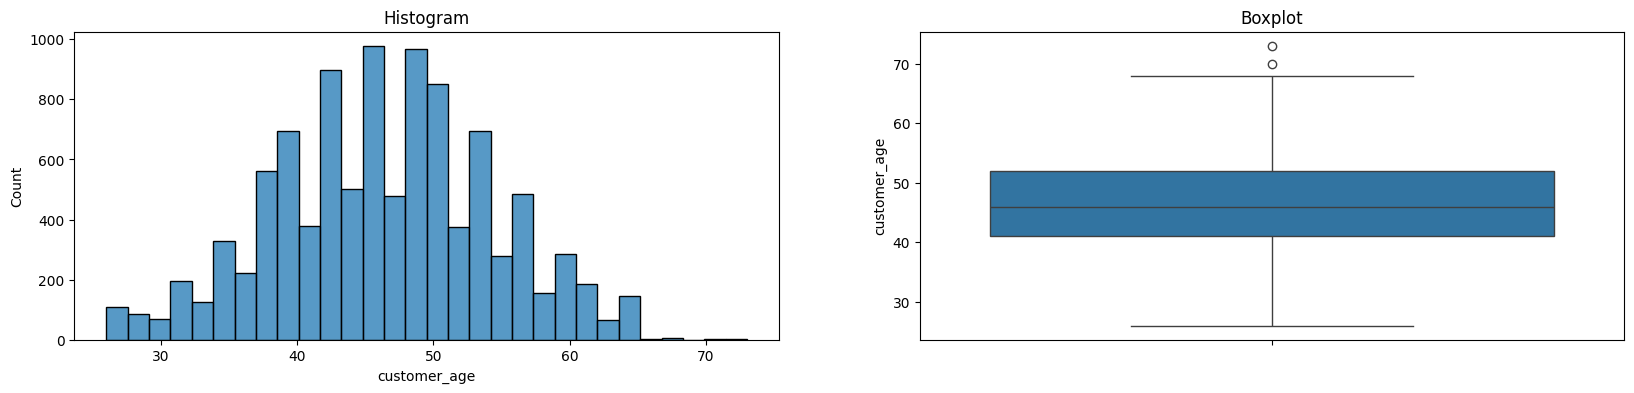

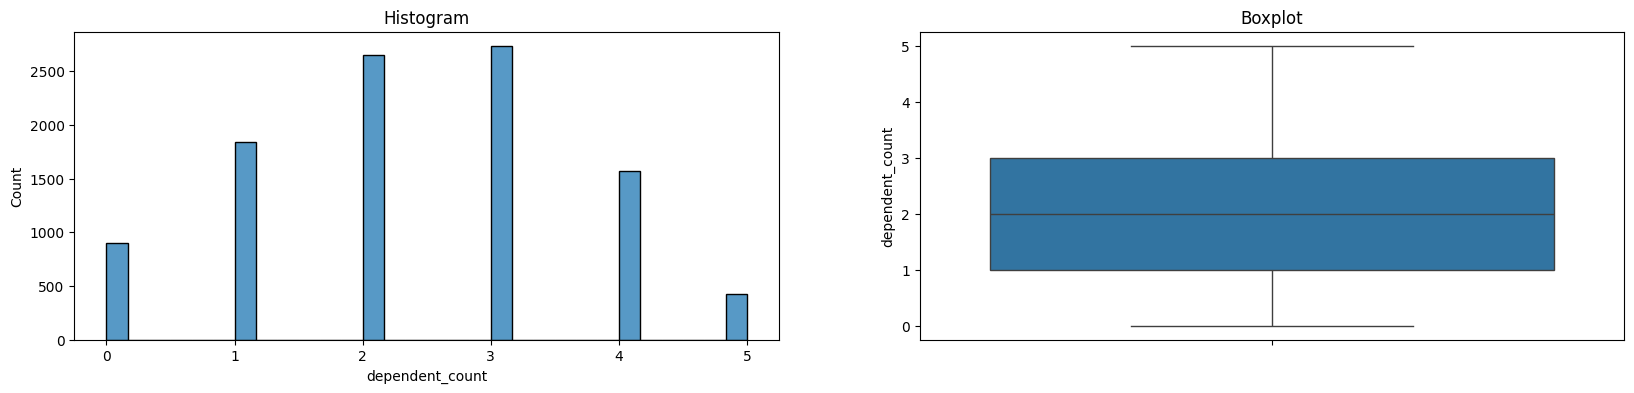

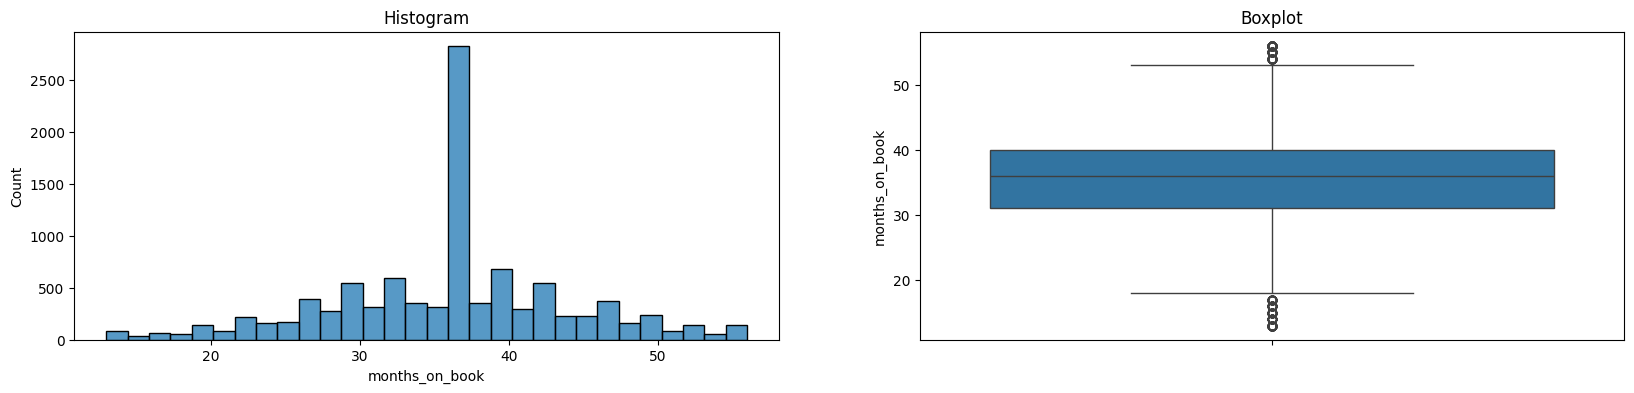

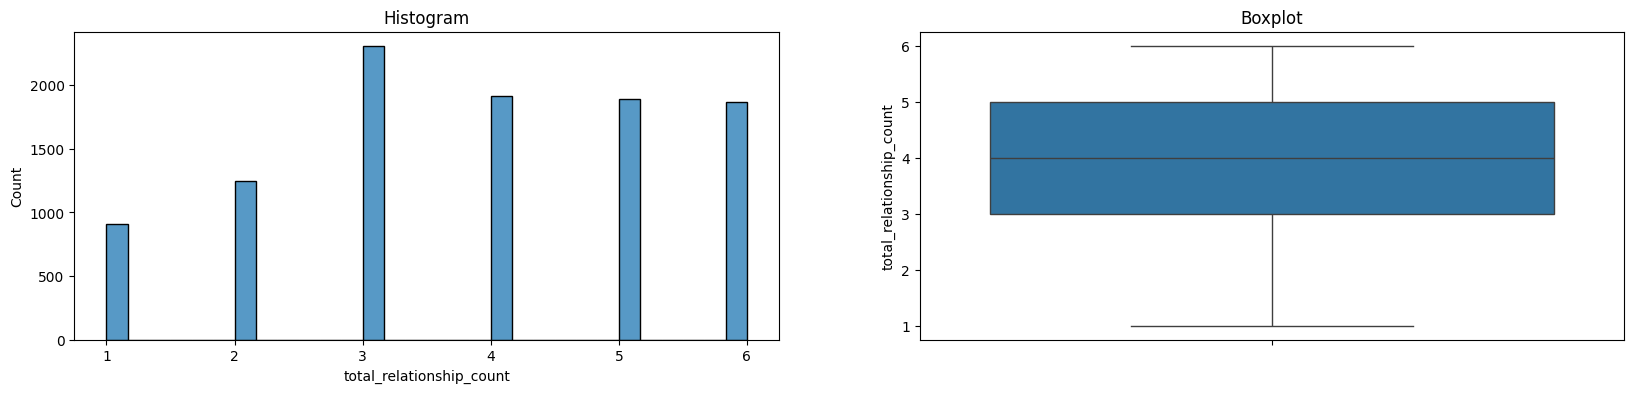

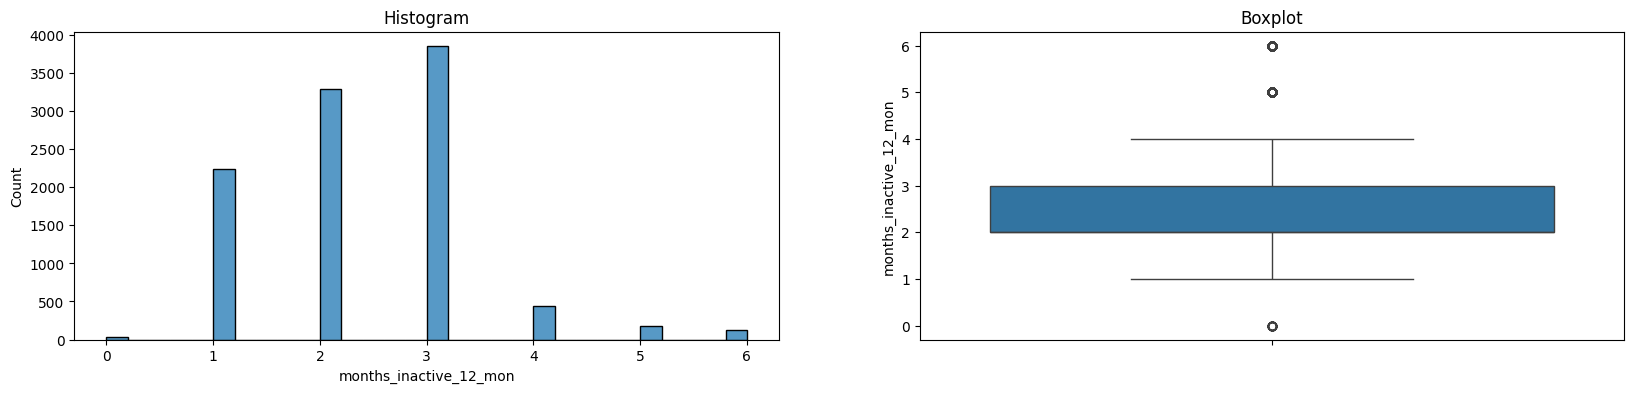

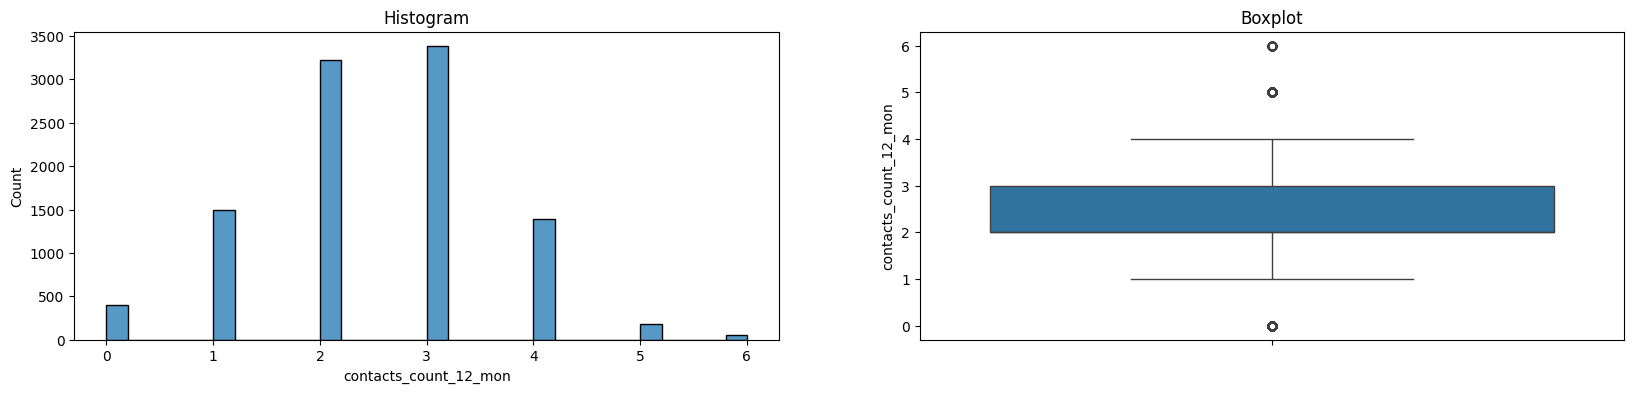

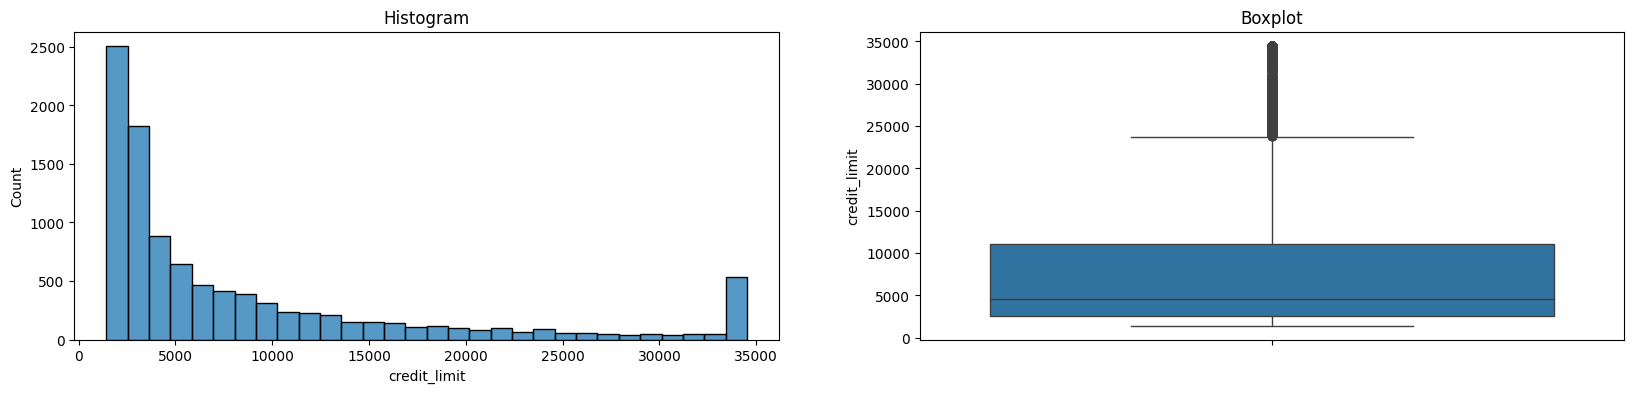

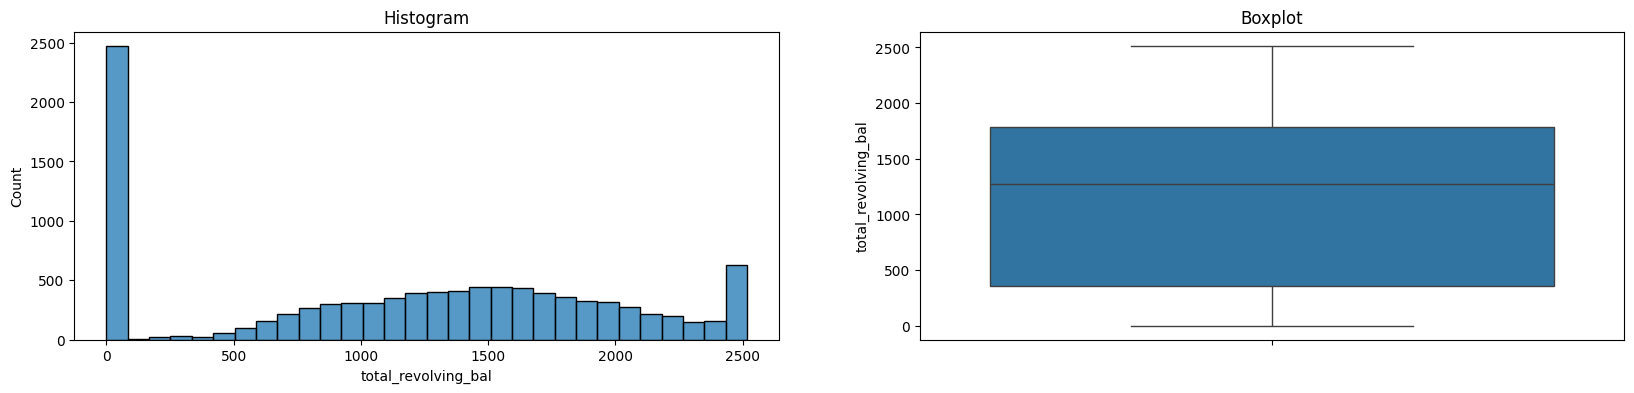

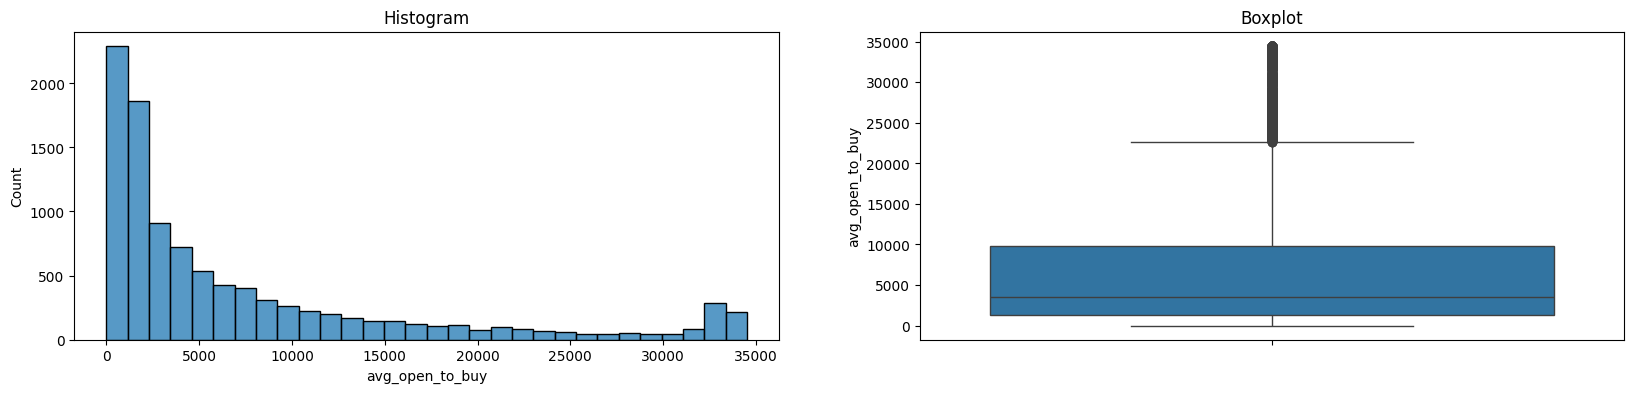

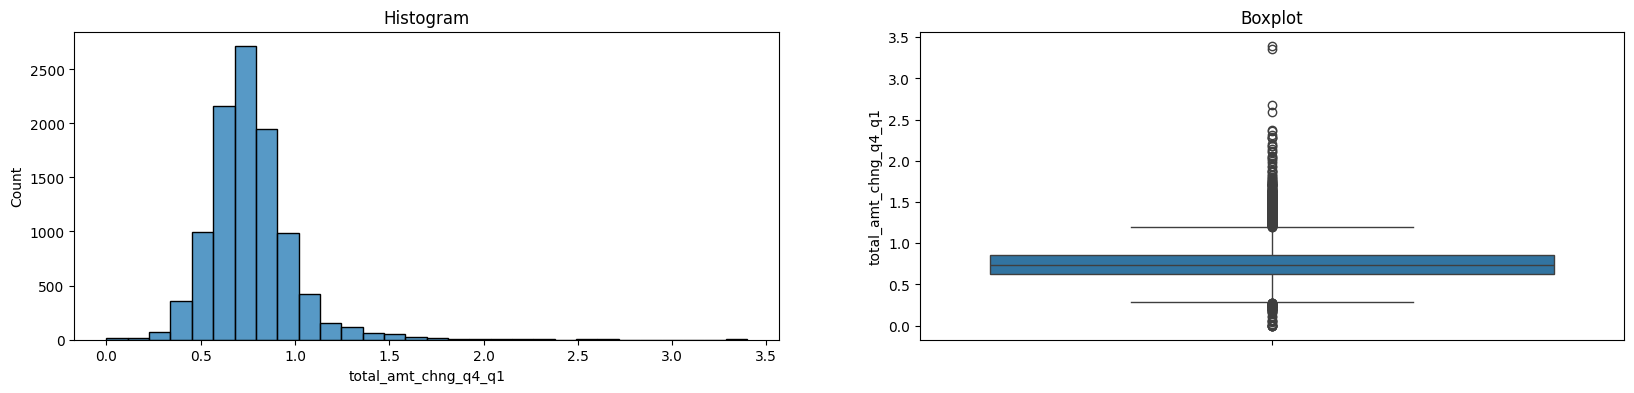

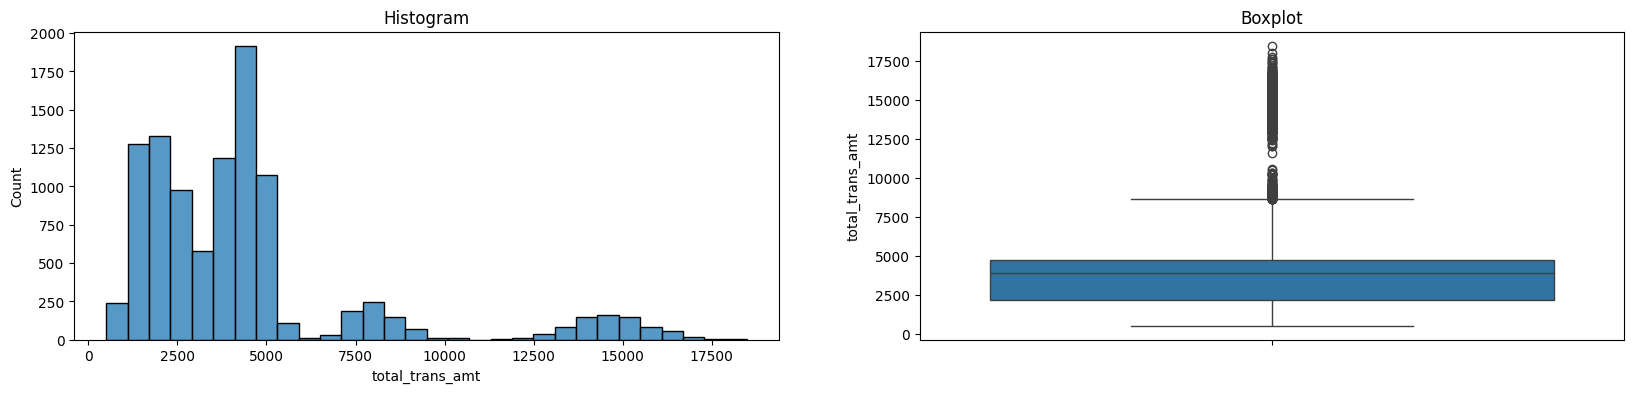

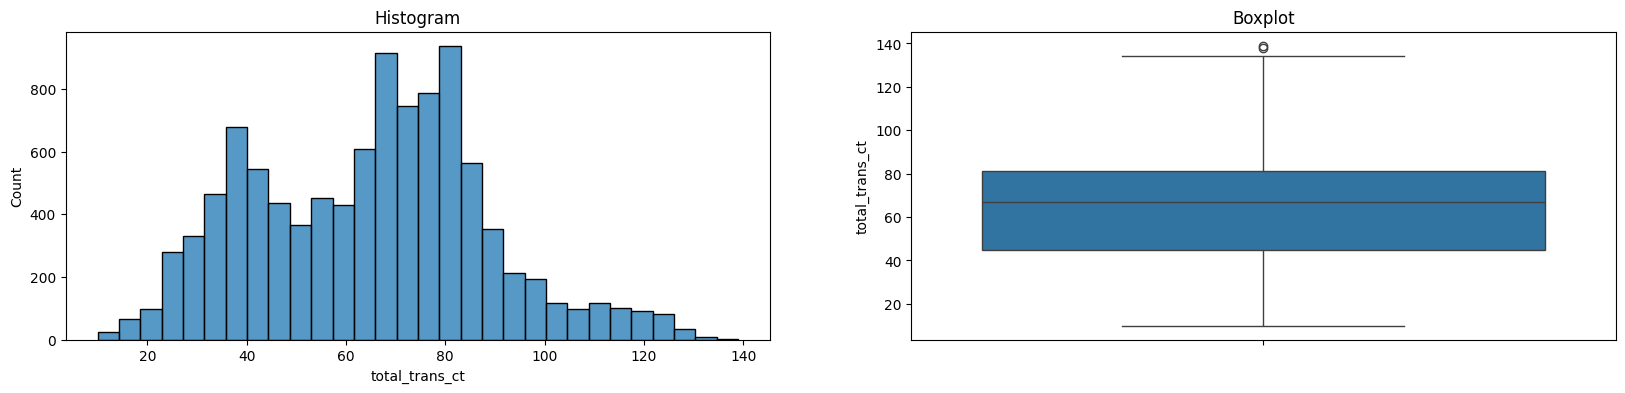

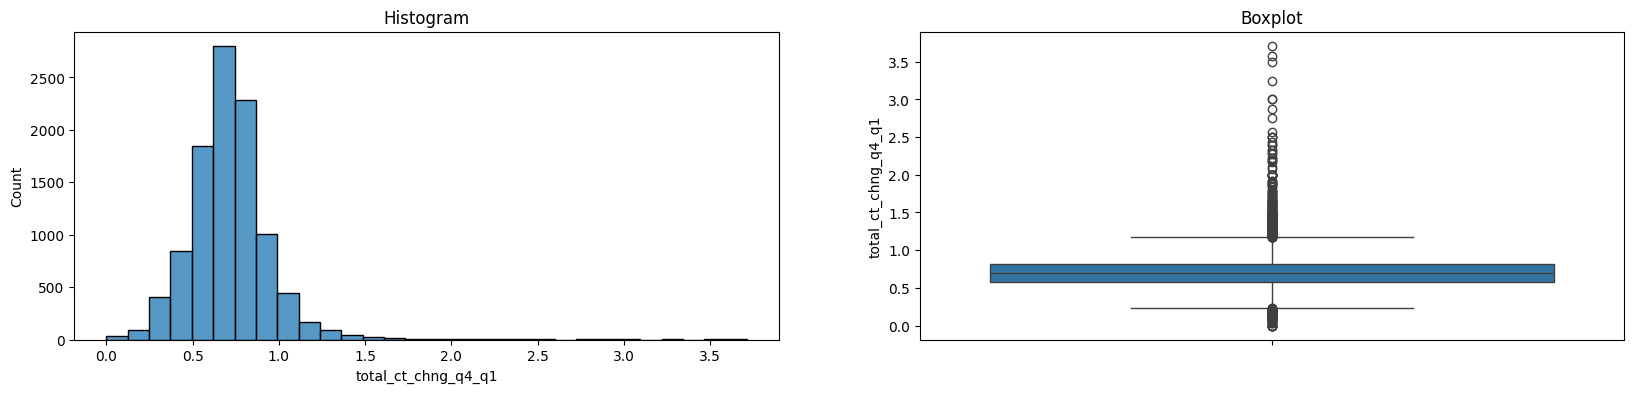

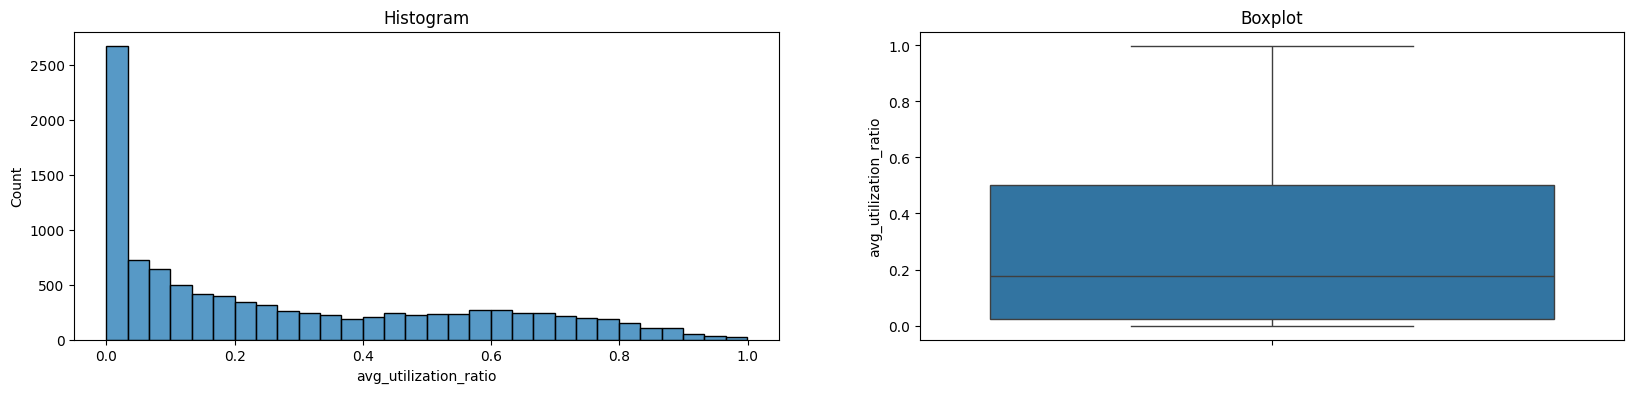

In [ ]:
check_plot(df)

Dataset Overview :

- Dimensi dataset ini adalah 10127 baris data dan 21 kolom
- Tipe data pada dataset ini beragam yaitu integer, float dan object
- Tidak ada missing value (termasuk NaN maupun inkonsistent Data)
- Tidak ada data duplikat
- Terdapat beberapa outlier namun yang dihandling hanyalah kolom total_amt_chng_q4_q1, total_ct_chng_q4_q1, total_trans_amt, avg_open_to_buy

In [ ]:
df.describe()

,user_id,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000



 Handling menggunakan Capping IQR(total_amt_chng_q4_q1, total_ct_chng_q4_q1).

In [ ]:
#Capping
iqr_cols = ['total_amt_chng_q4_q1', 'total_ct_chng_q4_q1']

# Hitung quartiles
df_desc = df[iqr_cols].describe()

for col in iqr_cols:
    Q1 = df_desc.loc['25%', col]
    Q3 = df_desc.loc['75%', col]
    IQR = Q3 - Q1

    # Batas Outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Nilai di atas batas atas akan diubah menjadi batas atas (Upper Bound)
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    # Nilai di bawah batas bawah akan diubah menjadi batas bawah (Lower Bound)
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])

    print(f"Capping IQR berhasil diterapkan pada kolom: {col} (Batas Atas: {upper_bound:.2f}, Batas Bawah: {lower_bound:.2f})")

Capping IQR berhasil diterapkan pada kolom: total_amt_chng_q4_q1 (Batas Atas: 1.20, Batas Bawah: 0.29)
Capping IQR berhasil diterapkan pada kolom: total_ct_chng_q4_q1 (Batas Atas: 1.17, Batas Bawah: 0.23)


Penjelasan :

Saya menggunakan metode Capping, salah satu metode handling outlier tanpa harus menghapus banyak data. Hal ini dikarenakan rentangnya tidak terlalu jauh dan saya juga tidak ingin kehilangan banyak informasi.  Metode ini bekerja dengan mengganti nilai outlier yang berada di atas kuartil ketiga (Q3) atau di bawah kuartil pertama (Q1) dengan batas capping yang ditentukan (yaitu Q3+1.5∗IQR dan Q1−1.5∗IQR). Sehingga pendekatan ini dapat mengurangi pengaruh ekstrim dari outlier sehingga dapat menghasilkan model yang lebih representatif dan menjaga keutuhan dataset.

In [ ]:
#Trimming
def trim_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


df = trim_outliers_iqr(df, ['avg_open_to_buy', 'total_trans_amt'])


Penjelasan :

Saya menggunakan metode trimming pada avg_open_to_buy dan total_trans_amt, salah satu metode handling outlier. Trimming adalah teknik di mana kita secara langsung menghapus data pada persentil ekstrem dari dataset untuk menghilangkan nilai-nilai yang sangat jauh dari rata-rata. Metode ini dapat digunakan untuk memastikan bahwa nilai-nilai ekstrem yang bisa jadi merupakan kesalahan atau anomali tidak mengganggu analisis statistik atau performa model prediktif, meskipun konsekuensinya adalah kehilangan sebagian kecil dari data.

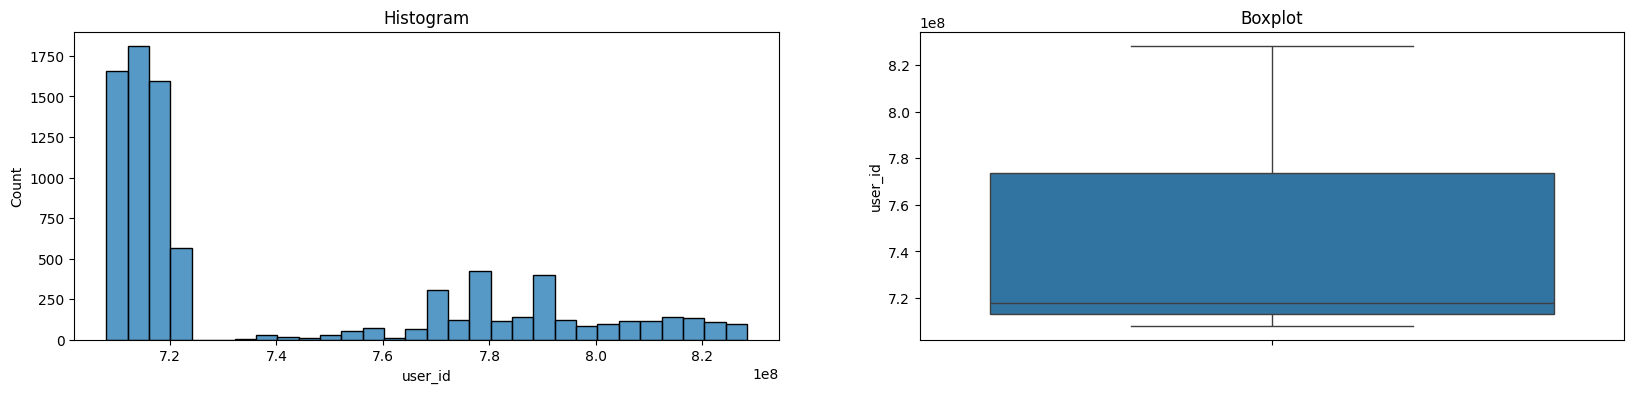

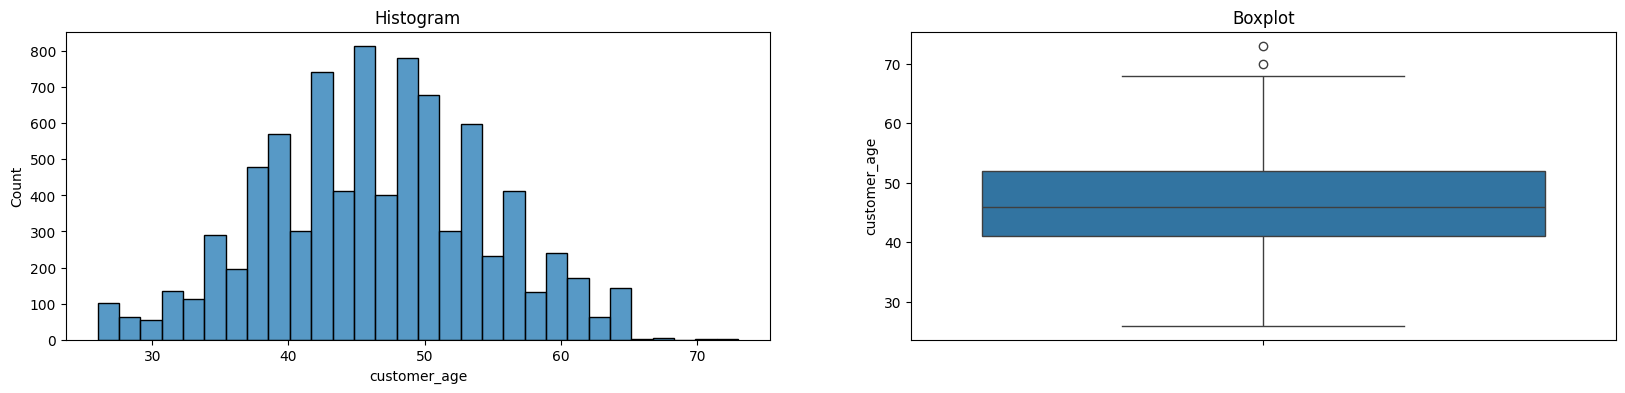

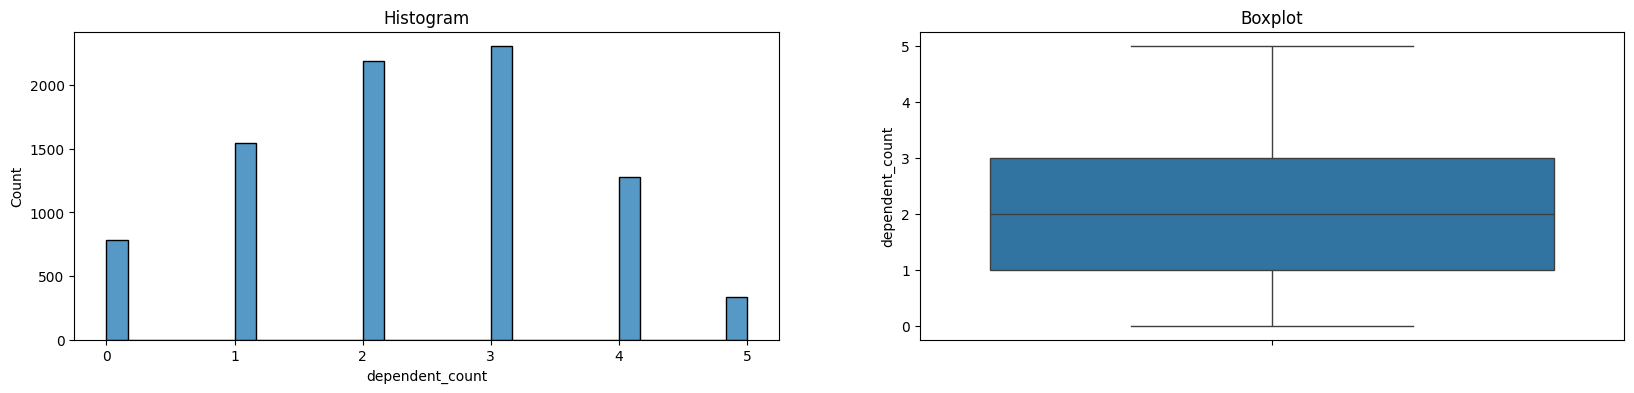

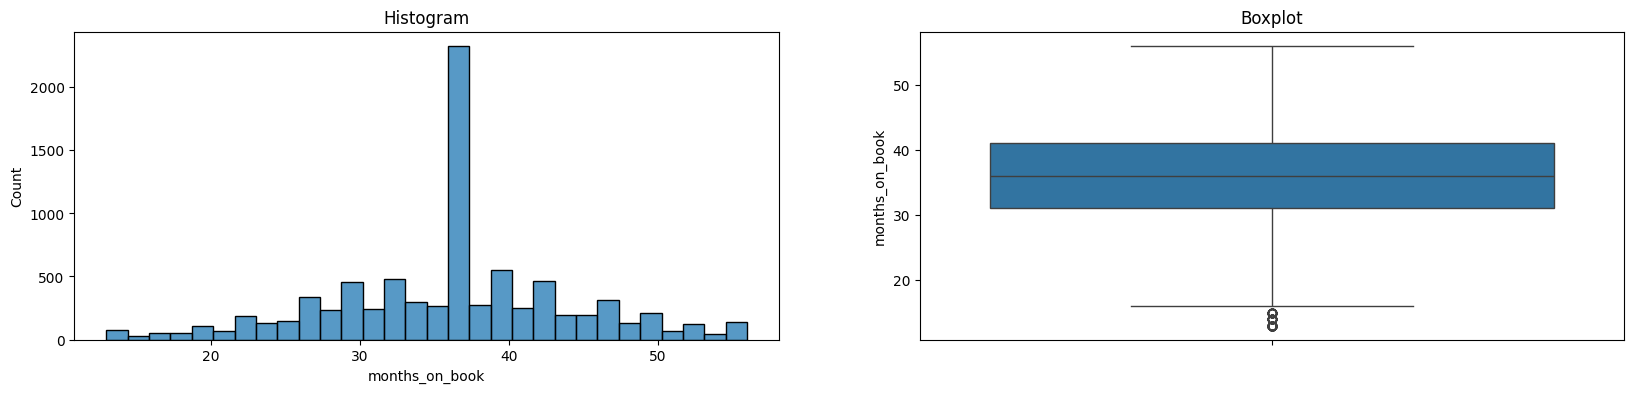

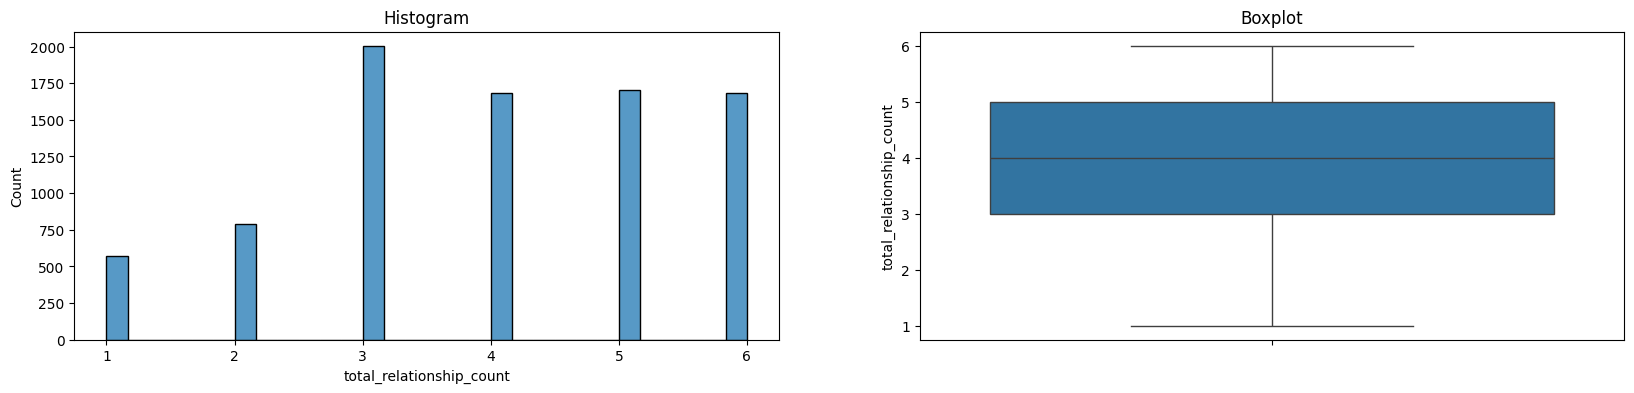

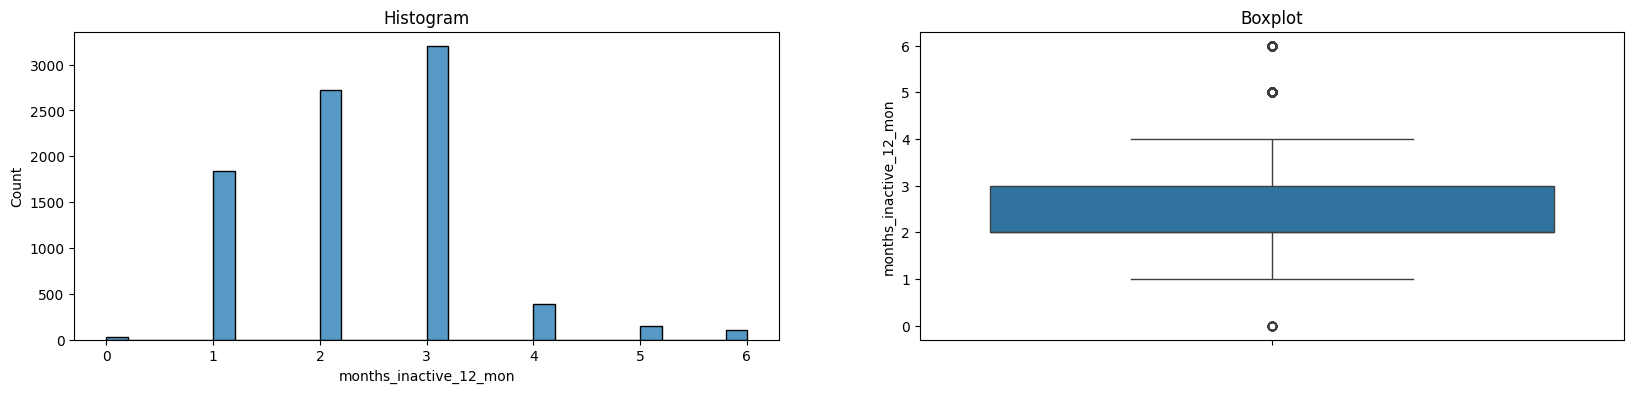

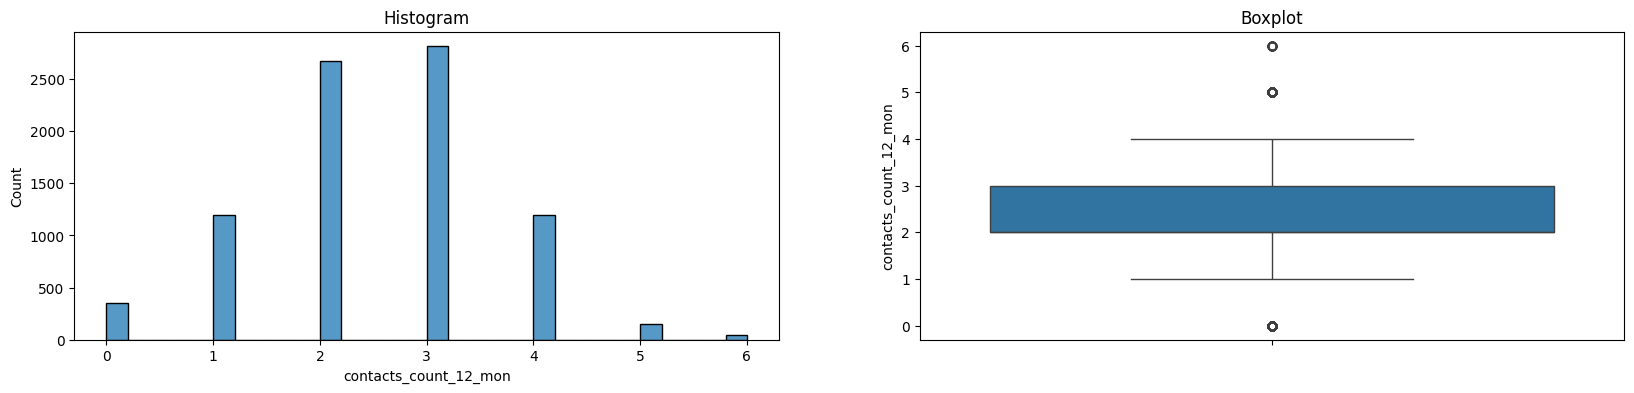

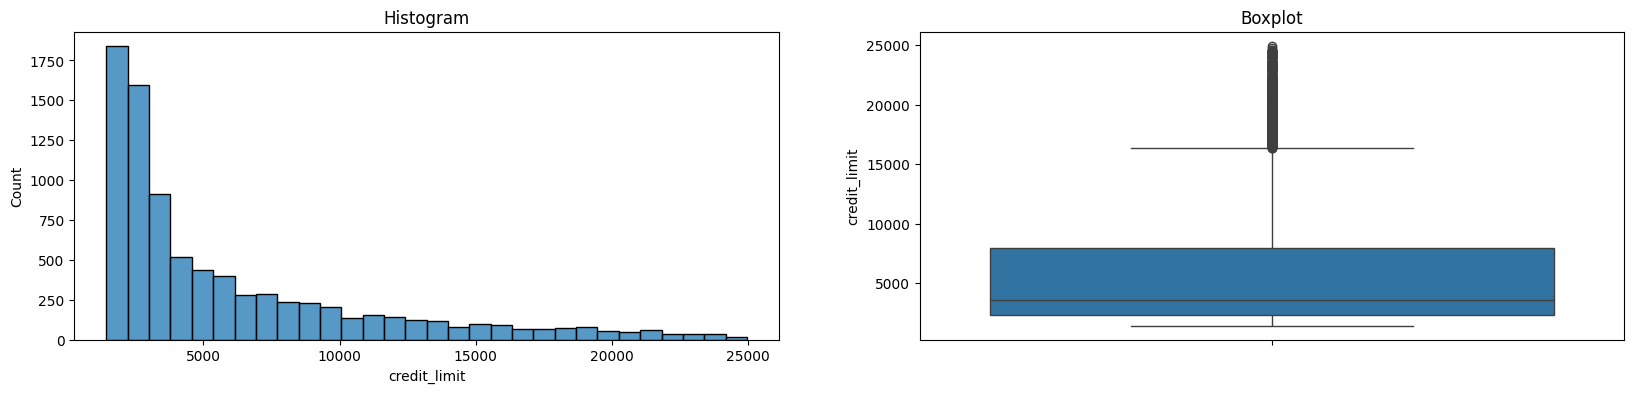

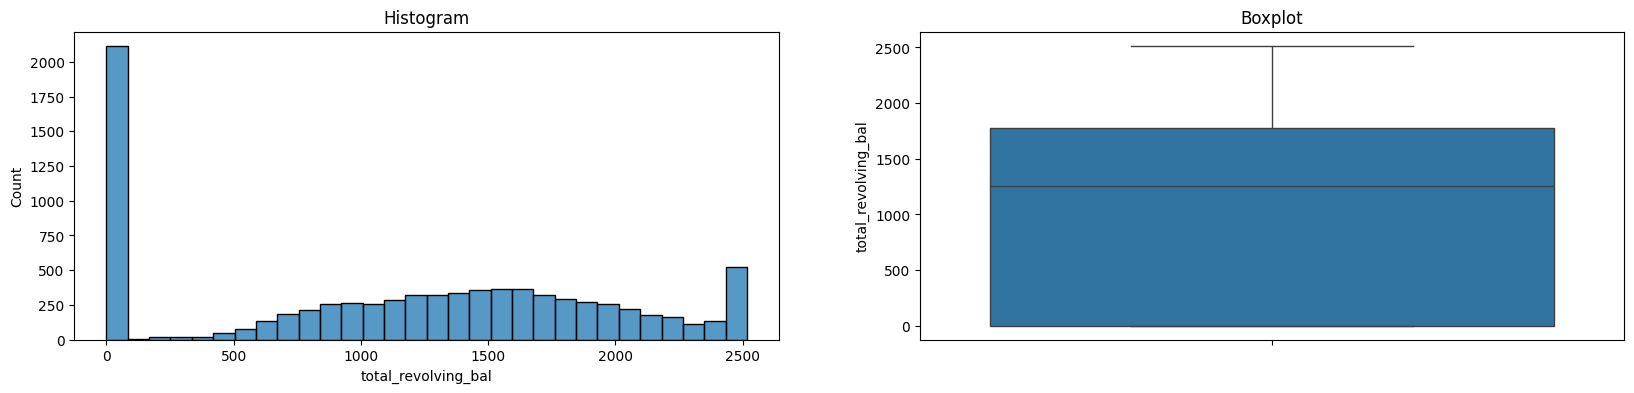

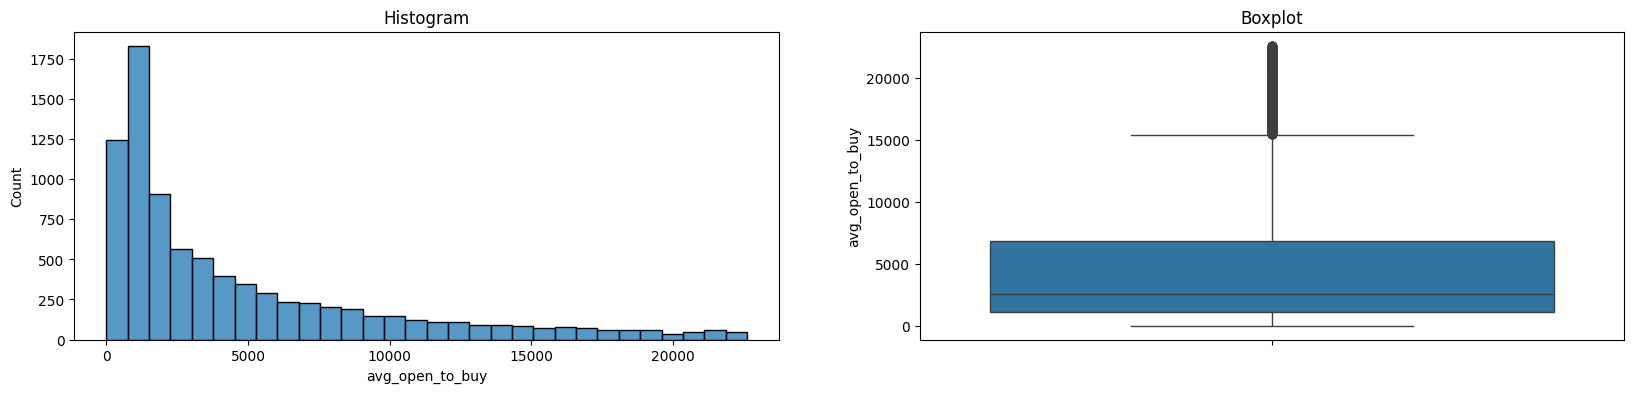

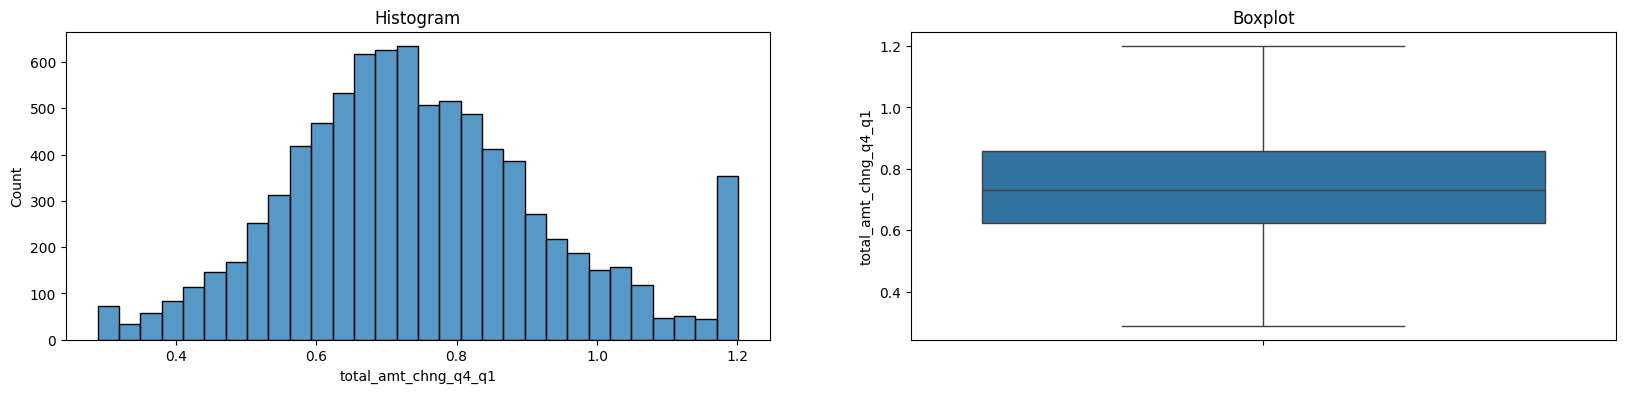

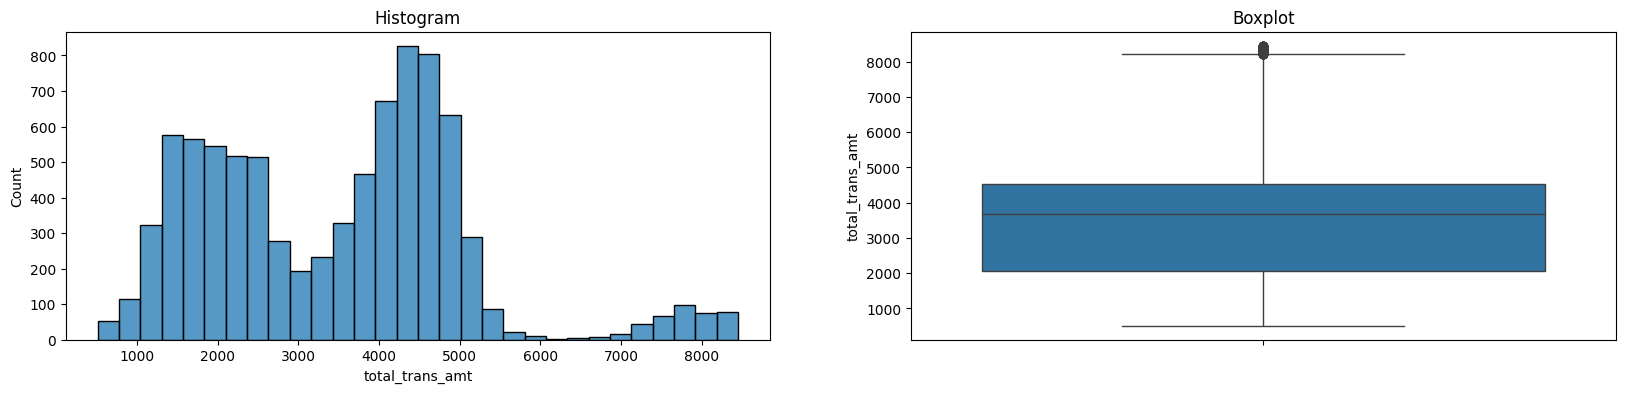

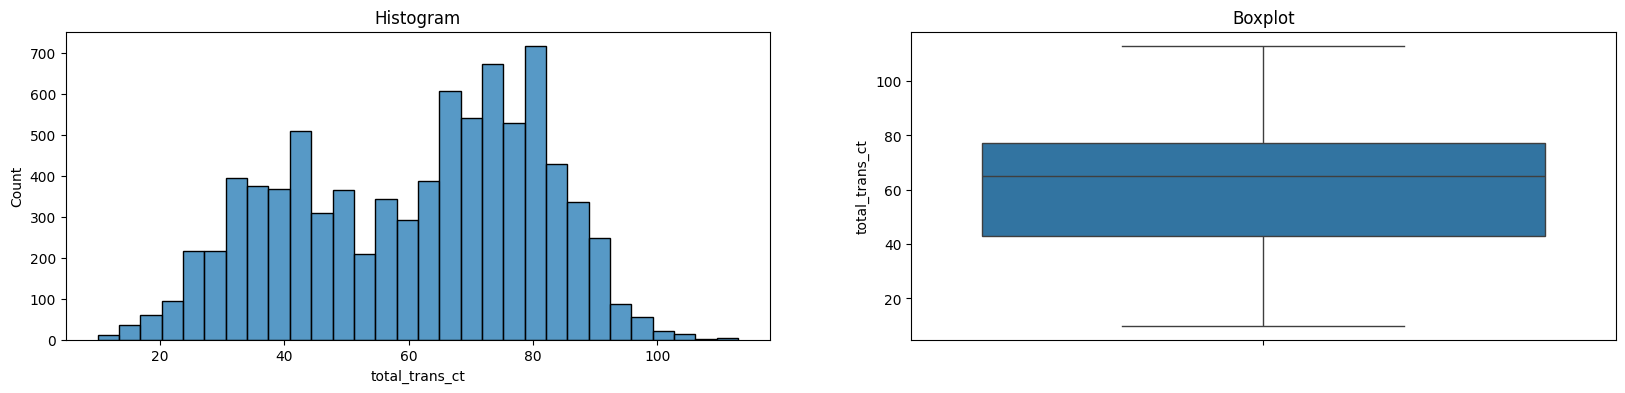

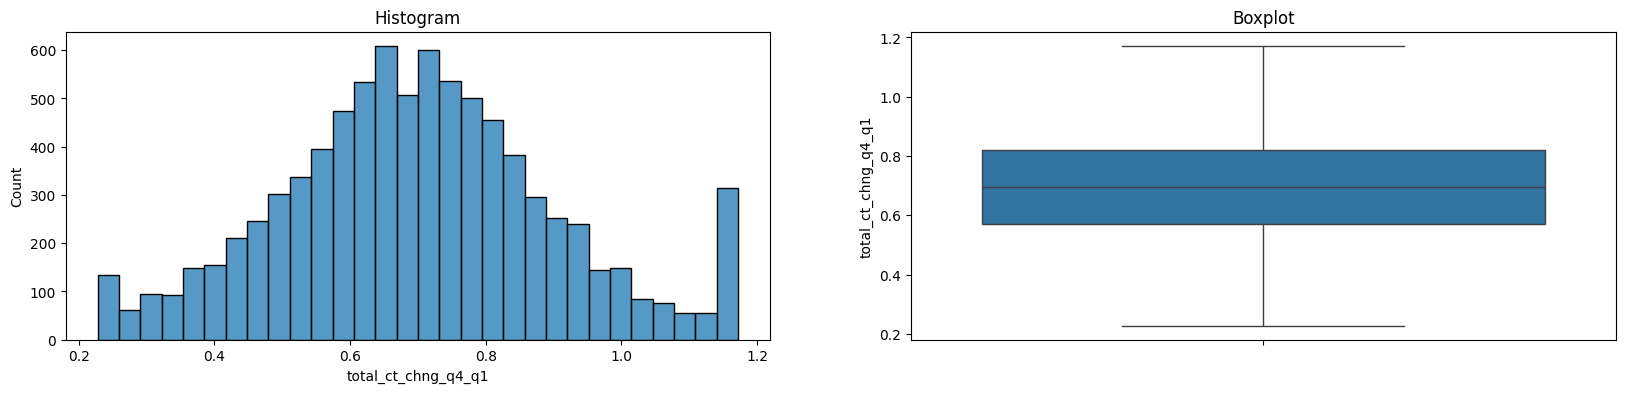

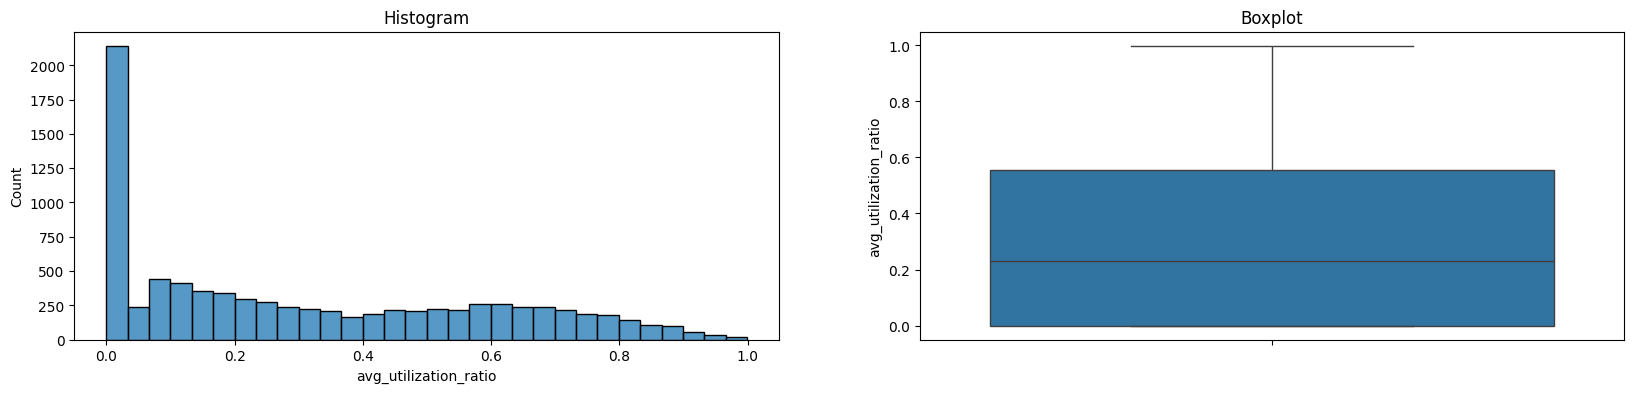

In [ ]:
check_plot(df)

Handling outlier selesai!

# EDA

1. Analisis distribusi usia pelanggan dan identifikasi kelompok usia yang memiliki kemungkinan churn terbesar.
2. Analisis hubungan antara tingkat pendidikan dan pendapatan, serta bagaimana korelasinya dengan churn.
3. Identifikasi perbedaan churn berdasarkan gender.


## Distribusi usia pelanggan dan identifikasi kelompok usia yang memiliki kemungkinan churn terbesar

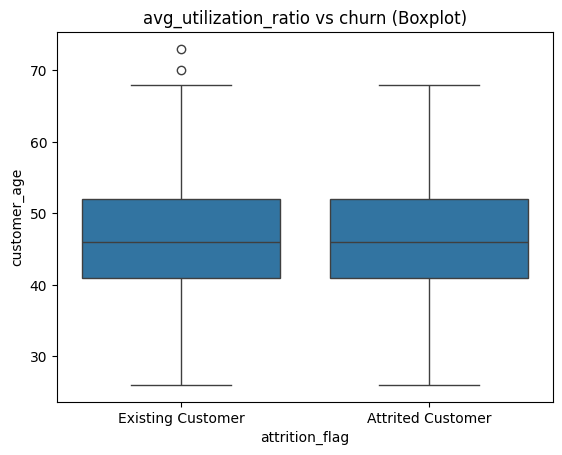

In [ ]:
sns.boxplot(data=df, x='attrition_flag', y=df['customer_age'])
plt.title(f"{i} vs churn (Boxplot)")
plt.show()

Penjelasan :

Berdasarkan visualisasi diatas, distribusi usia pelanggan antara Existing Customer dan Attrited Customer sangat mirip. Dapat dilihat dari median, IQR, dan sebaran usia secara keseluruhan hampir sama terhadap dua kelompok pelanggan ini. Hal ini menunjukkan bahwa usia pelanggan bukan faktor utama membedakan atau prediksi pelanggan mana yang akan melakukan churn pada kasus ini.

In [ ]:
df['customer_age'].value_counts().sort_index(ascending=True)

,count
customer_age,
26,76
27,25
28,22
29,41
30,55
31,59
32,75
33,114
34,126


In [ ]:
# Feature Engineering
group_range = [
    (df['customer_age'] <= 30),
    df['customer_age'].between(31, 45),
    df['customer_age'].between(46, 65),
    df['customer_age'].between(66, 73),
]

categories = [
    'Dewasa Muda',
    'Dewasa Madya',
    'Dewasa Tua',
    'Lansia'
]

df['age_group'] = np.select(group_range, categories, default='Unknown')


In [ ]:
# Feature Engineering
churn_analysis = df.groupby('age_group')['attrition_flag'].value_counts(normalize=True).unstack()
churn_analysis

attrition_flag,Attrited Customer,Existing Customer
age_group,,
Dewasa Madya,0.164654,0.835346
Dewasa Muda,0.100457,0.899543
Dewasa Tua,0.167215,0.832785
Lansia,0.200000,0.800000


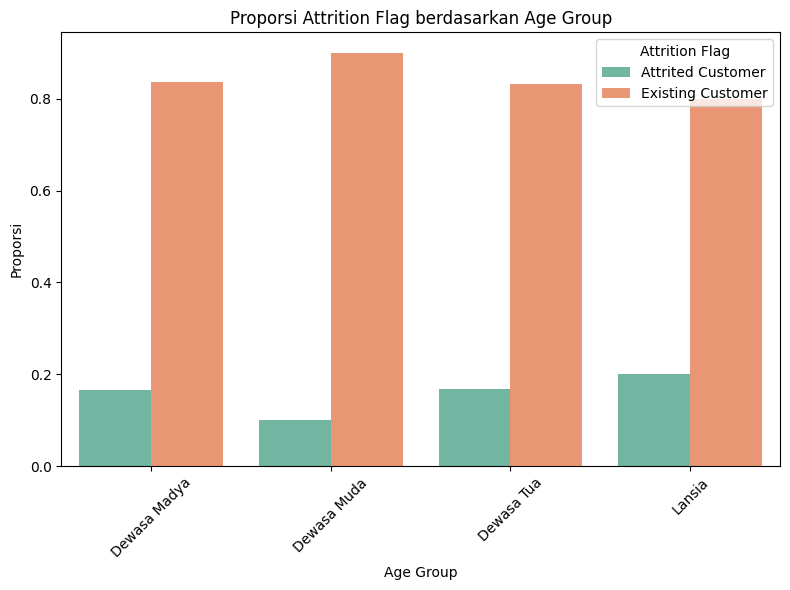

In [ ]:
churn_plot = churn_analysis.reset_index().melt(id_vars='age_group',
                                               var_name='Attrition_Flag',
                                               value_name='Proporsi')

plt.figure(figsize=(8,6))
sns.barplot(x='age_group', y='Proporsi', hue='Attrition_Flag', data=churn_plot, palette="Set2")

plt.title("Proporsi Attrition Flag berdasarkan Age Group")
plt.ylabel("Proporsi")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.legend(title="Attrition Flag")
plt.tight_layout()
plt.show()

Penjelasan :

Berdasarkan hasil analisis diatas, ditemukan bahwa Tingkat churn paling rendah ditemukan pada kelompok Dewasa Muda dengan persentase sekitar 10%, sementara itu, tingkat churn cenderung meningkat seiring bertambahnya usia, mencapai puncaknya pada kelompok Lansia yang menunjukkan tingkat churn tertinggi sekitar 20%. Hal ini mengindikasikan bahwa kelompok pelanggan yang lebih tua memiliki potensi lebih besar untuk churn dibandingkan kelompok pelanggan yang paling muda.

## Analisis hubungan antara tingkat pendidikan dan pendapatan, serta bagaimana korelasinya dengan churn.

### Secara General

Hubungan tingkat pendidikan dan pendapatan

In [ ]:
from scipy.stats import chisquare, chi2_contingency

edu_level = df['education_level']
income = df['income_category']
churn = df['attrition_flag']

corr_edu_income = pd.concat([edu_level, income], axis=1)

contingency_table = pd.crosstab(corr_edu_income['education_level'], corr_edu_income['income_category'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
 # mencari kekuatan sampel
n = contingency_table.sum().sum()
max_dim= max(contingency_table.shape) - 1 # Kurangi 1 untuk dof (degrees of freedom)
cramers_v = np.sqrt(chi2 / (n * max_dim)) # Koreksi rumus V

#menampilkan hasil

print(f"============= education_level & income_category =================")
print(f"Stats Chi-Square : {chi2}")
print(f"P-value for education_level & income_category: {p:.4f}")
print(f"value cramers : {cramers_v:.4f}")

if p < 0.05:
    print(f"P-value for education_level & income_category: {p:.4f} -> Ada hubungan signifikan")
else:
    print(f"P-value for education_level & income_category: {p:.4f} -> Tidak ada hubungan secara signifikan")

============= education_level & income_category =================
Stats Chi-Square : 35.94262093443665
P-value for education_level & income_category: 0.2100
value cramers : 0.0266
P-value for education_level & income_category: 0.2100 -> Tidak ada hubungan secara signifikan


Penjelasan :

Berdasarkan hasil uji statistik yang diberikan, dapat disimpulkan bahwa tidak ada hubungan yang signifikan secara statistik antara tingkat pendidikan dan kategori pendapatan. Nilai p-value sebesar 0.2100, yang jauh lebih besar dari ambang batas signifikansi (0.05), artinya bahwa perbedaan pendapatan antar kelompok pendidikan tidak mencerminkan adanya hubungan secara signifikan.  Hal ini lebih lanjut didukung oleh nilai Cramer's V yang sangat rendah (0.0266), yang menunjukkan kekuatan hubungan yang sangat lemah.

### Korelasi Terhadap Churn

In [ ]:
churn = df[df['attrition_flag'] == 'Attrited Customer']

# Buat Tabel Silang
contingency_churn = pd.crosstab(churn['education_level'], churn['income_category'])

# Uji Chi-Square
chi2_churn, p_churn, dof_churn, expected_churn = chi2_contingency(contingency_churn)

# Hitung Cramér's V
n_churn = contingency_churn.sum().sum()
max_dim_churn = max(contingency_churn.shape) - 1
cramers_v_churn = np.sqrt(chi2_churn / (n_churn * max_dim_churn))

print("============= ANALISIS CHURN ===============")
print(f"Stats Chi-Square : {chi2_churn:.2f}")
print(f"P-value : {p_churn:.4f}")
print(f"Cramér's V (Kekuatan Hubungan): {cramers_v_churn:.4f}")

if p_churn < 0.05:
    print(f"Ada hubungan signifikan antara Pendidikan dan Pendapatan KHUSUS pada pelanggan yang CHURN.")
else:
    print(f"Tidak ada hubungan signifikan antara Pendidikan dan Pendapatan pada pelanggan yang CHURN.")

if cramers_v_churn < 0.1:
  print(f"value cramers : {cramers_v_churn:.4f} -> Effect sangat lemah terhadap churn \n")
elif cramers_v_churn < 0.3:
  print(f"value cramers : {cramers_v_churn:.4f} -> Effect lemah terhadap churn \n")
elif cramers_v_churn  < 0.5:
  print(f"value cramers : {cramers_v_churn:.4f} -> Effect medium terhadap churn \n")
else:
  print(f"value cramers : {cramers_v_churn:.4f} -> Effect kuat terhadap churn \n")

============= ANALISIS CHURN ===============
Stats Chi-Square : 40.73
P-value : 0.0914
Cramér's V (Kekuatan Hubungan): 0.0700
Tidak ada hubungan signifikan antara Pendidikan dan Pendapatan pada pelanggan yang CHURN.
value cramers : 0.0700 -> Effect sangat lemah terhadap churn 



Insight :

Berdasarkan hasil analisis, menunjukkan bahwa **tidak ada hubungan yang signifikan secara statistik** antara tingkat pendidikan dan pendapatan pada kelompok pelanggan yang melakukan *churn*. Hal ini terlihat dari nilai **p-value sebesar 0.0914** yang lebih besar dari ambang batas (0.05). Selain itu, nilai **Cramér's V yang sangat rendah (0.0700)** artinya bahwa kekuatannya sangat lemah dan tidak memiliki efek yang berarti. Dengan kata lain, tingkat pendidikan dan pendapatan pelanggan yang *churn* tidak saling mempengaruhi secara signifikan, dan keduanya bukanlah faktor utama yang dapat memprediksi atau menjelaskan terjadinya *churn* dalam kasus ini.

## Identifikasi perbedaan churn berdasarkan gender.

In [ ]:
gender_churn = pd.concat([df['gender'], df['attrition_flag']], axis=1)
print(gender_churn.value_counts())

gender  attrition_flag
F       0                 4043
M       0                 3006
F       1                  882
M       1                  505
Name: count, dtype: int64


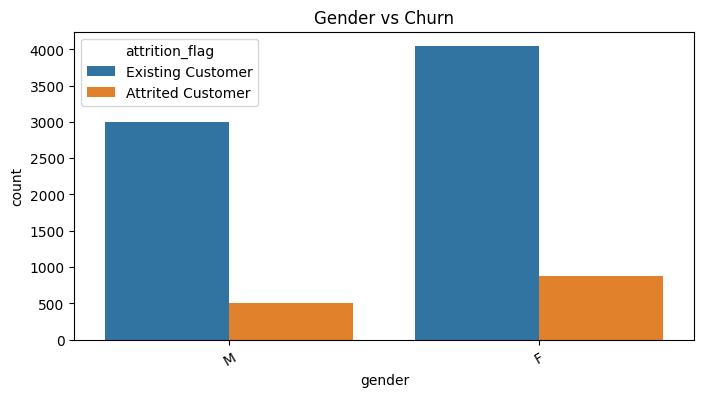

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(data=gender_churn, x='gender', hue='attrition_flag')
plt.title("Gender vs Churn")
plt.xticks(rotation=30)
plt.show()

Penjelasan :

 Hasil visualisasi diatas menunjukkan hubungan antara jenis kelamin dan churn, terlihat bahwa jumlah pelanggan perempuan (F) lebih banyak daripada pelanggan laki-laki (M) secara keseluruhan. Artinya, tingkat churn pelanggan perempuan lebih tinggi secara signifikan dibandingkan pelanggan laki-laki. Jumlah pelanggan perempuan yang churn (attrited) mencapai sekitar 882 pelanggan, sedangkan pelanggan laki-laki hanya sekitar 505 pelanggan. Ini menunjukkan bahwa jenis kelamin adalah salah satu faktor yang memiliki pengaruh terhadap kecenderungan pelanggan untuk melakukan churn dalam kasus ini

# Data Preprocessing

In [ ]:
# ubah tipe data target
df['attrition_flag'] = df['attrition_flag'].map({'Attrited Customer': 1, 'Existing Customer': 0})

In [ ]:
df_churn = df.copy()

In [ ]:
feature = df_churn.drop(['attrition_flag', 'user_id','education_level','age_group',], axis=1)
target = df_churn['attrition_flag']

feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.20, random_state=42)

In [ ]:
print("size data feature train:",feature_train.shape)
print("size data feature test:",feature_test.shape)

size data feature train: (6748, 18)
size data feature test: (1688, 18)


## Encoding

In [ ]:
feature_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6748 entries, 5137 to 7857
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_age              6748 non-null   int64  
 1   gender                    6748 non-null   object 
 2   dependent_count           6748 non-null   int64  
 3   marital_status            6748 non-null   object 
 4   income_category           6748 non-null   object 
 5   card_category             6748 non-null   object 
 6   months_on_book            6748 non-null   int64  
 7   total_relationship_count  6748 non-null   int64  
 8   months_inactive_12_mon    6748 non-null   int64  
 9   contacts_count_12_mon     6748 non-null   int64  
 10  credit_limit              6748 non-null   float64
 11  total_revolving_bal       6748 non-null   int64  
 12  avg_open_to_buy           6748 non-null   float64
 13  total_amt_chng_q4_q1      6748 non-null   float64
 14  total_tran

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#OHE
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

### Training

In [ ]:
category_cols = ['gender', 'marital_status', 'card_category', 'income_category']

In [ ]:
one_hot_encoded = encoder.fit_transform(feature_train[category_cols])

ohe_df = pd.DataFrame(one_hot_encoded,
                      columns=encoder.get_feature_names_out(category_cols),
                      index=feature_train.index)

feature_train = pd.concat([feature_train.drop(columns=category_cols), ohe_df], axis=1)

In [ ]:
feature_train.head()

,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,gender_F,gender_M,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown,card_category_Blue,card_category_Gold,card_category_Platinum,card_category_Silver,income_category_$120K +,income_category_$40K - $60K,income_category_$60K - $80K,income_category_$80K - $120K,income_category_Less than $40K,income_category_Unknown
5137,46,3,39,3,3,0,1801.0,316,1485.0,0.494,2252,42,0.400,0.175,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1973,53,3,36,3,3,3,9355.0,715,8640.0,0.422,1138,38,0.727,0.076,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3436,47,3,31,6,3,6,5496.0,0,5496.0,0.548,1913,34,0.308,0.000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4061,48,3,36,5,1,4,3968.0,935,3033.0,0.649,4128,72,0.674,0.236,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7069,46,2,39,4,3,1,1610.0,0,1610.0,0.689,4958,87,0.776,0.000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Testing

In [ ]:
ohe_test = encoder.transform(feature_test[category_cols])

ohe_test_df = pd.DataFrame(
    ohe_test,
    columns=encoder.get_feature_names_out(category_cols),
    index=feature_test.index
)

feature_test = pd.concat([feature_test.drop(columns=category_cols), ohe_test_df], axis=1)

In [ ]:
feature_test.head()

,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,gender_F,gender_M,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown,card_category_Blue,card_category_Gold,card_category_Platinum,card_category_Silver,income_category_$120K +,income_category_$40K - $60K,income_category_$60K - $80K,income_category_$80K - $120K,income_category_Less than $40K,income_category_Unknown
6942,57,2,36,5,3,3,4316.0,0,4316.0,0.363,1920,53,0.472,0.000,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8756,46,4,27,1,2,3,6030.0,0,6030.0,1.031,4983,62,0.442,0.000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8678,38,3,31,2,3,2,15987.0,1766,14221.0,0.791,8195,94,0.679,0.110,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1252,37,2,28,5,2,4,6660.0,1362,5298.0,1.201,2660,51,0.759,0.205,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7836,47,5,42,3,5,3,4345.0,2176,2169.0,0.752,2458,44,0.467,0.501,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
feature_train.describe()

,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,gender_F,gender_M,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown,card_category_Blue,card_category_Gold,card_category_Platinum,card_category_Silver,income_category_$120K +,income_category_$40K - $60K,income_category_$60K - $80K,income_category_$80K - $120K,income_category_Less than $40K,income_category_Unknown
count,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000
mean,46.520747,2.324689,36.042679,3.981624,2.349881,2.455839,5923.938248,1152.065353,4771.872896,0.746269,3460.925756,61.047125,0.700660,0.309418,0.590101,0.409899,0.070243,0.468731,0.389597,0.071429,0.977919,0.002075,0.000445,0.019561,0.046384,0.190575,0.134114,0.119443,0.398340,0.111144
std,8.108590,1.300751,8.033701,1.490035,1.014416,1.114854,5144.009793,818.598858,5160.931989,0.188054,1586.352485,19.991635,0.201819,0.283887,0.491851,0.491851,0.255575,0.499058,0.487695,0.257558,0.146957,0.045505,0.021082,0.138497,0.210331,0.392784,0.340800,0.324333,0.489593,0.314334
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.289000,530.000000,10.000000,0.228000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,1.000000,32.000000,3.000000,2.000000,2.000000,2362.500000,0.000000,1071.000000,0.622000,2071.500000,43.000000,0.571000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,3597.500000,1261.000000,2516.500000,0.729000,3688.500000,65.000000,0.694000,0.234000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,52.000000,3.000000,41.000000,5.000000,3.000000,3.000000,7926.500000,1775.000000,6781.250000,0.854000,4515.250000,78.000000,0.821000,0.560250,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,24580.000000,2517.000000,22611.000000,1.201000,8454.000000,113.000000,1.172000,0.999000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Training

In [ ]:
# Kolom-kolom yang ingin di-standarisasi
columns_to_stdscaller = ['customer_age', 'dependent_count', 'months_on_book',
                         'total_relationship_count','months_inactive_12_mon','contacts_count_12_mon','credit_limit',
                         'total_revolving_bal','avg_open_to_buy','total_trans_amt','total_trans_ct']

# Inisialisasi StandardScaler
scaler = StandardScaler()

In [ ]:
feature_train[columns_to_stdscaller] = scaler.fit_transform(feature_train[columns_to_stdscaller])

In [ ]:
feature_train.head()

,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,gender_F,gender_M,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown,card_category_Blue,card_category_Gold,card_category_Platinum,card_category_Silver,income_category_$120K +,income_category_$40K - $60K,income_category_$60K - $80K,income_category_$80K - $120K,income_category_Less than $40K,income_category_Unknown
5137,-0.064226,0.519209,0.368142,-0.658841,0.640927,-2.202998,-0.801562,-1.021413,-0.636923,0.494,-0.762135,-0.952825,0.400,0.175,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1973,0.799120,0.519209,-0.005313,-0.658841,0.640927,0.488137,0.667051,-0.533958,0.749557,0.422,-1.464427,-1.152924,0.727,0.076,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3436,0.059109,0.519209,-0.627737,1.354683,0.640927,3.179272,-0.083198,-1.407467,0.140320,0.548,-0.975849,-1.353022,0.308,0.000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4061,0.182444,0.519209,-0.005313,0.683508,-1.330797,1.385182,-0.380264,-0.265187,-0.336955,0.649,0.420539,0.547913,0.674,0.236,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7069,-0.064226,-0.249635,0.368142,0.012333,0.640927,-1.305953,-0.838696,-1.407467,-0.612701,0.689,0.943791,1.298283,0.776,0.000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Testing

In [ ]:
feature_test[columns_to_stdscaller] = scaler.transform(feature_test[columns_to_stdscaller])

# Modelling

In [ ]:
# Import Decision Tree classifier (DT)
from sklearn.tree import DecisionTreeClassifier
# Import Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
# load SVM classifier model
from sklearn.svm import SVC
# load KNN classifier model
from sklearn.neighbors import KNeighborsClassifier
# Xg-Boost
from xgboost import XGBClassifier
# Light-GBM
from lightgbm import LGBMClassifier
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# MLP
# import multi-layer perceptron
from sklearn.neural_network import MLPClassifier

#Metrics Evaluate
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,make_scorer

## Model Based

In [ ]:
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(random_state = 42, probability=True),
    'MLP': MLPClassifier(random_state = 1000,hidden_layer_sizes = (8,), solver = 'sgd')
}

results = []

for name, clf in classifiers.items():
    clf.fit(feature_train, target_train)

    #predict di train
    y_pred_train = clf.predict(feature_train)
    y_pred_train_probs = clf.predict_proba(feature_train)[:, 1]

    #predict di test
    y_pred_test = clf.predict(feature_test)
    y_pred_test_probs = clf.predict_proba(feature_test)[:, 1]

    #evaluate di train
    precision_train = precision_score(target_train, y_pred_train, pos_label=1)
    recall_train = recall_score(target_train, y_pred_train, pos_label=1)
    f1_train = f1_score(target_train, y_pred_train, pos_label=1)
    roc_auc_train = roc_auc_score(target_train, y_pred_train_probs)

    #evaluate di test
    precision_test = precision_score(target_test , y_pred_test, pos_label=1)
    recall_test = recall_score(target_test , y_pred_test, pos_label=1)
    f1_test = f1_score(target_test , y_pred_test, pos_label=1)
    roc_auc_test = roc_auc_score(target_test , y_pred_test_probs)

    #hasil
    results.append({
        'Model': name,
        'Precision (train)': precision_train,
        'Recall (train)': recall_train,
        'F1-Score (train)': f1_train,
        'ROC AUC (train)': roc_auc_train,
        'Precision (test)': precision_test,
        'Recall (test)': recall_test,
        'F1-Score (test)': f1_test,
        'ROC AUC (test)': roc_auc_test
    })

#create dataframe
results_df = pd.DataFrame(results)
results_df

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1106, number of negative: 5642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002989 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2026
[LightGBM] [Info] Number of data points in the train set: 6748, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.163900 -> initscore=-1.629489
[LightGBM] [Info] Start training from score -1.629489


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model,Precision (train),Recall (train),F1-Score (train),ROC AUC (train),Precision (test),Recall (test),F1-Score (test),ROC AUC (test)
0,Logistic Regression,0.783540,0.628391,0.697441,0.937491,0.757322,0.644128,0.696154,0.926499
1,Decision Tree,1.000000,1.000000,1.000000,1.000000,0.785479,0.846975,0.815068,0.900389
2,Random Forest,1.000000,1.000000,1.000000,1.000000,0.914980,0.804270,0.856061,0.987088
3,XGBoost,1.000000,1.000000,1.000000,1.000000,0.919118,0.889680,0.904159,0.994294
4,LightGBM,1.000000,1.000000,1.000000,1.000000,0.917563,0.911032,0.914286,0.994823
5,KNN,0.889989,0.731465,0.802978,0.979525,0.808612,0.601423,0.689796,0.910613
6,SVM,0.908709,0.783002,0.841185,0.982271,0.885106,0.740214,0.806202,0.973850
7,MLP,0.829240,0.641049,0.723100,0.950358,0.816143,0.647687,0.722222,0.939934


## SVM

### Based Model

In [ ]:
svm = SVC(random_state = 42, probability=True)

svm.fit(feature_train, target_train)

SVC(probability=True, random_state=42)

In [ ]:
# Prediksi untuk data training
svm_pred_train = svm.predict(feature_train)
svm_pred_train_probs = svm.predict_proba(feature_train)[:, 1]

# Prediksi untuk data testing
svm_pred_test = svm.predict(feature_test)
svm_pred_test_probs = svm.predict_proba(feature_test)[:, 1]

# Evaluasi metrik untuk data training
svm_train_metrics = {
    'Precision': precision_score(target_train, svm_pred_train, pos_label=1),
    'Recall': recall_score(target_train, svm_pred_train, pos_label=1),
    'F1-Score': f1_score(target_train, svm_pred_train, pos_label=1),
    'ROC AUC': roc_auc_score(target_train, svm_pred_train_probs)
}

# Evaluasi metrik untuk data testing
svm_test_metrics = {
    'Precision': precision_score(target_test, svm_pred_test, pos_label=1),
    'Recall': recall_score(target_test, svm_pred_test, pos_label=1),
    'F1-Score': f1_score(target_test, svm_pred_test, pos_label=1),
    'ROC AUC': roc_auc_score(target_test, svm_pred_test_probs)
}

# Gabungkan ke dalam satu DataFrame
svm_evaluation_df = pd.DataFrame([svm_train_metrics, svm_test_metrics], index=['Train', 'Test'])

# Tampilkan hasil
svm_evaluation_df

,Precision,Recall,F1-Score,ROC AUC
Train,0.908709,0.783002,0.841185,0.982271
Test,0.885106,0.740214,0.806202,0.973850


### Hyperparameter Tuning Without Handling Imbalanced Data

In [ ]:
tuned_svm = SVC(probability=True)

# Definisikan parameter grid
param_grid = {'C': [0.1, 1, 10, 100, 1000],
                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                        'kernel': ['rbf']}

# Skema validasi silang
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Gunakan F1 sebagai metrik evaluasi
f1_scorer = make_scorer(f1_score)

# Grid Search
grid_search = GridSearchCV(
    estimator=tuned_svm,
    param_grid=param_grid,
    cv=cv,
    scoring=f1_scorer,
    verbose=3,
    n_jobs=-1,
    refit = True
)

# Fit model ke data training
grid_search.fit(feature_train, target_train)

# Cetak hasil terbaik
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best F1 score: ", grid_search.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best set of hyperparameters:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best F1 score:  0.7941709064044413


In [ ]:
# Ambil model terbaik dari hasil hypertuning
tuned_svm = grid_search.best_estimator_

# Prediksi pada data train
tuned_svm_pred_train = tuned_svm.predict(feature_train)
tuned_svm_pred_train_probs = tuned_svm.predict_proba(feature_train)[:, 1]

# Prediksi pada data test
tuned_svm_pred_test = tuned_svm.predict(feature_test)
tuned_svm_pred_test_probs = tuned_svm.predict_proba(feature_test)[:, 1]

# Evaluasi metrik untuk data train
tuned_train_metrics = {
    'Precision': precision_score(target_train, tuned_svm_pred_train, pos_label=1),
    'Recall': recall_score(target_train, tuned_svm_pred_train, pos_label=1),
    'F1-Score': f1_score(target_train, tuned_svm_pred_train, pos_label=1),
    'ROC AUC': roc_auc_score(target_train, tuned_svm_pred_train_probs)
}

# Evaluasi metrik untuk data test
tuned_test_metrics = {
    'Precision': precision_score(target_test, tuned_svm_pred_test, pos_label=1),
    'Recall': recall_score(target_test, tuned_svm_pred_test, pos_label=1),
    'F1-Score': f1_score(target_test, tuned_svm_pred_test, pos_label=1),
    'ROC AUC': roc_auc_score(target_test, tuned_svm_pred_test_probs)
}

# Buat DataFrame evaluasi
tuned_svm_evaluation_df = pd.DataFrame([tuned_train_metrics, tuned_test_metrics], index=['Train', 'Test'])

# Tampilkan hasil evaluasi
tuned_svm_evaluation_df

,Precision,Recall,F1-Score,ROC AUC
Train,0.985294,0.969259,0.977211,0.998320
Test,0.812030,0.768683,0.789762,0.969805


### Hyperparameter Tuning With SMOTE

In [ ]:
pipe = Pipeline([
    ('sampling', None),
    ('model', SVC(probability=True))
])

param_grid = {'sampling': [SMOTE(random_state=42)],
              'model__C': [0.1, 1, 10, 100, 1000],
              'model__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'model__kernel': ['poly'],
              'model__degree': [2, 3]
              }

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scorer = make_scorer(f1_score)

#grid search
random_search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_grid,
    cv=cv,
    scoring=f1_scorer,
    verbose=3,
    n_jobs=-1,
    refit = True
)

# Fit the model
random_search.fit(feature_train, target_train)

#the best parameter
print("Best set of hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best set of hyperparameters:  {'sampling': SMOTE(random_state=42), 'model__kernel': 'poly', 'model__gamma': 0.01, 'model__degree': 3, 'model__C': 100}
Best score:  0.7727118031092474


In [ ]:
# Ambil model terbaik dari hasil hypertuning
tuned_svm_smote = random_search.best_estimator_

# Prediksi pada data train
tuned_svm_smote_pred_train = tuned_svm_smote.predict(feature_train)
tuned_svm_smote_pred_train_probs = tuned_svm_smote.predict_proba(feature_train)[:, 1]

# Prediksi pada data test
tuned_svm_smote_pred_test = tuned_svm_smote.predict(feature_test)
tuned_svm_smote_pred_test_probs = tuned_svm_smote.predict_proba(feature_test)[:, 1]

# Evaluasi metrik untuk data train
tuned_train_smote_metrics = {
    'Precision': precision_score(target_train, tuned_svm_smote_pred_train, pos_label=1),
    'Recall': recall_score(target_train, tuned_svm_smote_pred_train, pos_label=1),
    'F1-Score': f1_score(target_train, tuned_svm_smote_pred_train, pos_label=1),
    'ROC AUC': roc_auc_score(target_train, tuned_svm_smote_pred_train_probs)
}

# Evaluasi metrik untuk data test
tuned_test_smote_metrics = {
    'Precision': precision_score(target_test, tuned_svm_smote_pred_test, pos_label=1),
    'Recall': recall_score(target_test, tuned_svm_smote_pred_test, pos_label=1),
    'F1-Score': f1_score(target_test, tuned_svm_smote_pred_test, pos_label=1),
    'ROC AUC': roc_auc_score(target_test, tuned_svm_smote_pred_test_probs)
}

# Buat DataFrame evaluasi
tuned_svm_smote_evaluation_df = pd.DataFrame([tuned_train_smote_metrics, tuned_test_smote_metrics], index=['Train', 'Test'])

# Tampilkan hasil evaluasi
tuned_svm_smote_evaluation_df

,Precision,Recall,F1-Score,ROC AUC
Train,0.721345,0.950271,0.820133,0.980006
Test,0.697222,0.893238,0.783151,0.967079


Penjelasan :

Menggunakan SVM dengan Hyperparameter tuning menggunakan SMOTE untuk analisis lebih lanjut terkait churn karena lebih seimbang dan tidak terlalu overfitting.

# Evaluation Model

In [ ]:
evaluation_df = pd.DataFrame([svm_train_metrics, svm_test_metrics,
                              tuned_train_metrics, tuned_test_metrics,
                              tuned_train_smote_metrics, tuned_test_smote_metrics],
                             index = ['Base SVM (Train)', 'Base SVM (Test)',
                                      'Hyperparameter Tuning SVM (Train)', 'Hyperparameter Tuning SVM (Test)',
                                      'Hyperparameter Tuning SVM menggunakan SMOTE (Train)', 'Hyperparameter Tuning SVM menggunakan SMOTE (Test)'])
evaluation_df

,Precision,Recall,F1-Score,ROC AUC
Base SVM (Train),0.908709,0.783002,0.841185,0.982271
Base SVM (Test),0.885106,0.740214,0.806202,0.973850
Hyperparameter Tuning SVM (Train),0.985294,0.969259,0.977211,0.998320
Hyperparameter Tuning SVM (Test),0.812030,0.768683,0.789762,0.969805
Hyperparameter Tuning SVM menggunakan SMOTE (Train),0.721345,0.950271,0.820133,0.980006
Hyperparameter Tuning SVM menggunakan SMOTE (Test),0.697222,0.893238,0.783151,0.967079


Penjelasan :

Berdasarkan hasil model SVM baik melalui based model, hyperparameter tuning tanpa SMOTE dan hyperparameter tuning dengan SMOTE. Menghasilkan berbagai macam variasi performa. Namun jika strategi bisnis ingin menangkap sebanyak mungkin pelanggan yang akan churn maka dapat dilihat dengan hasil recall tinggi (89%) serta gap recallnya tidak terlalu jauh yaitu 6% (hal ini dapat dilihat model dengan tuned SMOTE lebih unggul dibandingkan yang lain) meskipun precision nya mencapai 69% namun gapnya tidak terlalu jauh beda (hanya 3%) dibandingkan model yang lain yang gapnya lebih dari 6%. Dengan kata lain, model ini lebih proaktif dalam mengidentifikasi pelanggan berisiko, meskipun ada peningkatan kasus di mana model salah memprediksi pelanggan yang sebenarnya tidak akan churn (false positive).

<Figure size 800x600 with 0 Axes>

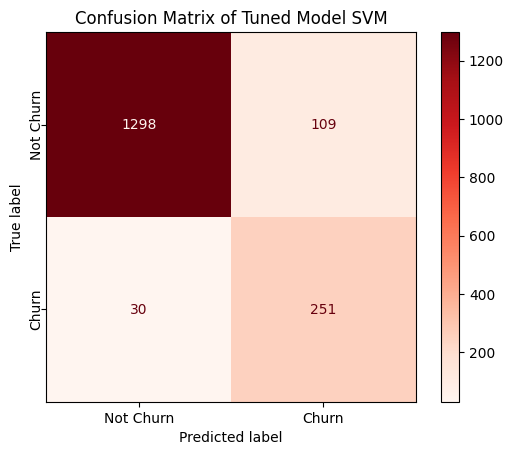

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion matrix untuk model SVM yang sudah di-tune
cm_svm = confusion_matrix(target_test, tuned_svm_smote_pred_test)

# Tampilkan confusion matrix
svm_display = ConfusionMatrixDisplay(confusion_matrix=cm_svm,
                                      display_labels=['Not Churn', 'Churn'])

plt.figure(figsize=(8, 6))
svm_display.plot(cmap='Reds', values_format='d')
plt.yticks(rotation=90, ha='center', va='center')
plt.title('Confusion Matrix of Tuned Model SVM')
plt.show()

Penjelasan :

Model ini berhasil mengidentifikasi 251 pelanggan yang benar-benar akan churn, dan hanya salah memprediksi 30 kasus churn sebagai pelanggan yang tidak akan churn (false negative). Selain itu, model juga salah memprediksi 109 pelanggan yang sebenarnya tidak akan churn sebagai pelanggan yang berisiko (false positive). Secara keseluruhan, dengan recall sebesar 89.3%, model ini sangat cocok untuk strategi bisnis yang memprioritaskan identifikasi sebanyak mungkin pelanggan yang berpotensi churn.

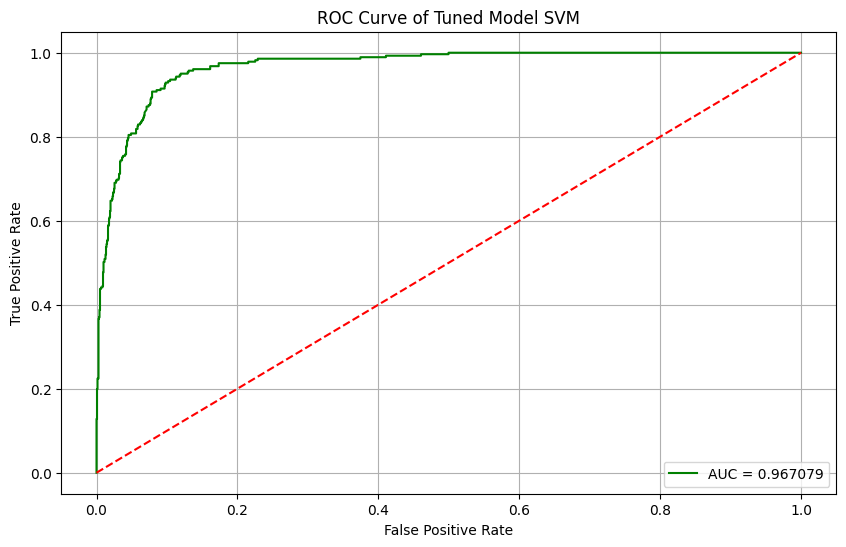

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Hitung ROC curve dan AUC untuk model SVM
svm_fpr, svm_tpr, svm_thresholds = roc_curve(target_test, tuned_svm_smote_pred_test_probs)
svm_roc_auc = roc_auc_score(target_test, tuned_svm_smote_pred_test_probs)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(svm_fpr, svm_tpr, color='green', label=f'AUC = {svm_roc_auc:.6f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC Curve of Tuned Model SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Penjelasan :

Model SVM menunjukkan performa yang sangat baik dalam memprediksi churn. Hal ini dapat dilihat dari nilai AUC mencapai 0.967 yang artinya bahwa model ini memiliki kemampuan yang baik dalam membedakan pelanggan yang berpotensi churn dan tidak.

# Model Agnostic Methods

In [ ]:
import dalex as dx

svm_exp = dx.Explainer(
    tuned_svm_smote,
    feature_train,
    target_train,
    label="SVM Interpretation"
)

Preparation of a new explainer is initiated

  -> data              : 6748 rows 30 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 6748 values
  -> model_class       : sklearn.svm._classes.SVC (default)
  -> label             : SVM Interpretation
  -> predict function  : <function yhat_proba_default at 0x798ebc6a9300> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 1e-07, mean = 0.221, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.0, mean = -0.0569, max = 0.999
  -> model_info        : package imblearn

A new explainer has been created!


## Feature Importance

In [ ]:
# visualizr permutation feature importance for SVM
svm_exp.model_parts().plot()

Penjelasan :


Berdasarkan analisis variabel penting (variable importance) untuk model SVM, terlihat bahwa total_trans_ct (jumlah total transaksi) adalah fitur yang paling dominan dan memiliki pengaruh paling besar dalam memprediksi churn. Nilai drop-out loss dari variabel ini (+0.241) jauh lebih tinggi dibandingkan variabel lainnya. Hal ini menunjukkan bahwa frekuensi transaksi pelanggan adalah faktor terpenting yang menjadi dasar keputusan model.

## Partial Dependence plot

In [ ]:
# create partial dependence plot of SVM
svm_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 30/30 [02:50<00:00,  5.69s/it]


Penjelasan :

Berdasarkan visualisasi diatas, terlihat bahwa sebagian besar variabel, seperti gender, status pernikahan, kategori kartu, dan kategori pendapatan, tidak memiliki pengaruh yang signifikan terhadap prediksi model, yang ditunjukkan oleh garis lurus horizontal pada grafiknya. Sebaliknya, hanya beberapa variabel perilaku dan transaksional yang menunjukkan hubungan kuat dengan kemungkinan churn. Secara spesifik, model memprediksi bahwa semakin tinggi jumlah transaksi (total_trans_ct), semakin rendah kemungkinan pelanggan untuk churn, menunjukkan bahwa aktivitas yang tinggi adalah indikator utama retensi. Sementara itu, variabel total_trans_amt dan total_revolving_bal juga memiliki pengaruh, tetapi tidak sekuat total_trans_ct.